# Spec2Vec
1. Import MS-MS data from MGF file
2. Create smaller subset of data
3. Train Spec2Vec models for both datasets

In [3]:
# Locations
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA"
PATH_MS_DATA = ROOT + "\\Data\\GNPS_all\\"
PATH_SAVE_MODEL = ROOT + "\\Spec2Vec\\models_trained\\"
PATH_SAVE_DATA = ROOT + "\\Spec2Vec\\data\\"
PATH_SPEC2VEC = ROOT + "\\Spec2Vec\\code\\"

In [4]:
import numpy as np
import sys
sys.path.insert(0, PATH_SPEC2VEC)

import helper_functions as functions
import MS_functions

### 1. Import MS-MS data from MGF file
MGF file from gnps dataset was created following notebook: "Spec2Vec_MGF_from_gnps_library_search.ipynb"

In [8]:
# Import & filter data from all-GNPS dataset
file_json = PATH_MS_DATA + "filtered_data_LibrariesAll_minpeak2_loss500_2dec_exp001.json"
file_mgf = ROOT + "\\Data\\GNPS_all\\" + "all_gnps_191015_modified.mgf"

spectra, spectra_dict, MS_documents, MS_documents_intensity, sub_spectra_metadata = MS_functions.load_MGF_data(file_mgf = file_mgf,
                                                           file_json = file_json,
                                                           num_decimals = 2,
                                                           min_frag = 0.0, max_frag = 1000.0,
                                                           min_loss = 5.0, max_loss = 500.0,
                                                           min_intensity_perc = 0,
                                                           exp_intensity_filter = 0.01,
                                                           peaks_per_mz = 20/200,
                                                           min_peaks = 2,
                                                           max_peaks = None,
                                                           peak_loss_words = ['peak_', 'loss_'])

Spectra json file found and loaded.


In [9]:
print("Number of imported spectra:", len(spectra))

Number of imported spectra: 145002


In [46]:
spectra[10].inchi

'1S/C26H43NO5/c1-15(4-7-22(30)27-14-23(31)32)18-5-6-19-24-20(9-11-26(18,19)3)25(2)10-8-17(28)12-16(25)13-21(24)29/h15-21,24,28-29H,4-14H2,1-3H3,(H,27,30)(H,31,32)/t15?,16-,17+,18+,19-,20-,21+,24-,25?,26?/m0/s1'

In [52]:
spectra[10].metadata['spectrumid']

'CCMSLIB00005435454'

In [53]:
lst_inchi = []
lst_inchikey = []
lst_smiles = []
lst_spectrumid = []
for spec in spectra:
    if 'inchi' in spec.metadata:
        lst_inchi.append(spec.metadata['inchi'])
    else:
        lst_inchi.append('0')
    if 'inchikey' in spec.metadata:
        lst_inchikey.append(spec.metadata['inchikey'])
    else:
        lst_inchikey.append('0')
    if 'smiles' in spec.metadata:
        lst_smiles.append(spec.metadata['smiles'])
    else:
        lst_smiles.append('0')
    if 'spectrumid' in spec.metadata:
        lst_spectrumid.append(spec.metadata['spectrumid'])
    else:
        lst_spectrumid.append('0')

In [64]:
lst_inchi.count('0') + lst_inchi.count('N/A'), lst_inchikey.count('0'), lst_smiles.count('0') + lst_smiles.count('N/A'), lst_spectrumid.count('0')

(67682, 70118, 105703, 0)

In [65]:
len(set(lst_spectrumid))

145002

In [57]:
id = lst_spectrumid.index('CCMSLIB00000479569')
lst_inchi[id]

'"InChI=1S/C7H6O4/c8-4-1-2-6(9)5(3-4)7(10)11/h1-3,8-9H,(H,10,11)"'

In [61]:
id = lst_spectrumid.index('CCMSLIB00003139591')
lst_inchi[id], lst_smiles[id]

('N/A', 'N/A')

In [28]:
from matplotlib import pyplot as plt

def compare_spectra(spec1, spec2, min_mz = None, max_mz = None):
    """ Plot different spectra together to compare.
    """
    plt.figure(figsize=(10,10))

    peak_number = []
    new_min_mz = 9999
    new_max_mz = 0
    colors = ['crimson', 'teal']
    for i, spec in enumerate([spec1, spec2]):
        peaks = np.array(spec.peaks.copy())
        peak_number.append(len(peaks))
        peaks[:,1] = peaks[:,1]/np.max(peaks[:,1]); 

        if new_min_mz > np.min(peaks[:,0]):
            new_min_mz = np.min(peaks[:,0])
        if new_max_mz < np.max(peaks[:,0]):
            new_max_mz = np.max(peaks[:,0])

        markerline, stemlines, baseline = plt.stem(peaks[:,0], (-1)**(i+1)*peaks[:,1], linefmt='-', markerfmt='.', basefmt='r-')
        plt.setp(stemlines, 'color', colors[i])
    
    if min_mz == None: #then update
        min_mz = max(0, (new_min_mz - 5))
    if max_mz == None: #then update
        max_mz = new_max_mz + 10
        
    plt.xlim((min_mz, max_mz))
    plt.grid(True)
    plt.title('Spectrum')
    plt.xlabel('m/z')
    plt.ylabel('peak intensity')
    
    plt.show()
    
    print("Number of peaks: ", peak_number)

100 101
pepmasses:  447.241 817.581
Smiles 1: C[C@H](CCC(=O)O)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2[C@@H]([C@@H]([C@H]4[C@@]3(CC[C@H](C4)O)C)O)O)C
Smiles 2: C[C@H](CCC(=O)O)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2[C@@H]([C@@H]([C@H]4[C@@]3(CC[C@H](C4)O)C)O)O)C
Inchi 1: 1S/C24H40O5/c1-13(4-7-19(26)27)15-5-6-16-20-17(9-11-23(15,16)2)24(3)10-8-14(25)12-18(24)21(28)22(20)29/h13-18,20-22,25,28-29H,4-12H2,1-3H3,(H,26,27)/t13?,14-,15-,16+,17+,18+,20+,21-,22+,23?,24?/m1/s1
Inchi 2: 1S/C24H40O5/c1-13(4-7-19(26)27)15-5-6-16-20-17(9-11-23(15,16)2)24(3)10-8-14(25)12-18(24)21(28)22(20)29/h13-18,20-22,25,28-29H,4-12H2,1-3H3,(H,26,27)/t13?,14-,15-,16+,17+,18+,20+,21-,22+,23?,24?/m1/s1


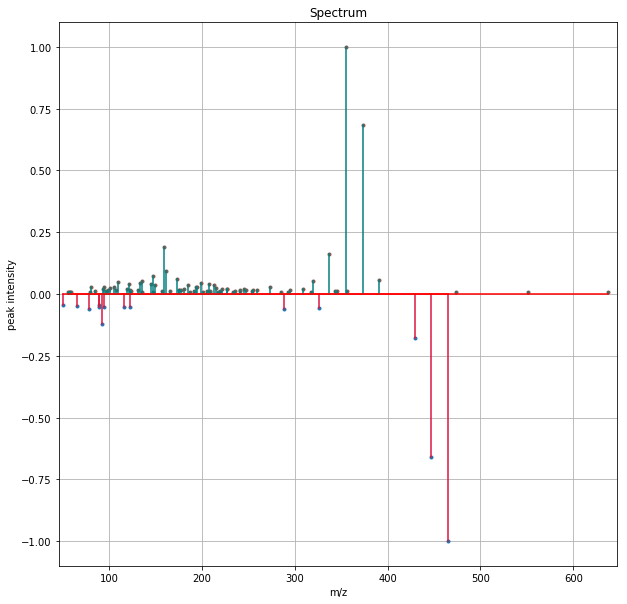

Number of peaks:  [14, 80]


In [42]:
ID1, ID2 = 100,101
print(ID1,ID2)
print("pepmasses: ", spectra[ID1].metadata['pepmass'][0], spectra[ID2].metadata['pepmass'][0])
print("Smiles 1:", spectra[ID1].metadata['smiles'])
print("Smiles 2:", spectra[ID2].metadata['smiles'])
if 'inchi' in spectra[ID1].metadata:
    print("Inchi 1:", spectra[ID1].metadata['inchi'])
if 'inchi' in spectra[ID2].metadata:
    print("Inchi 2:", spectra[ID2].metadata['inchi'])
    
compare_spectra(spectra[ID1],spectra[ID2], min_mz = None, max_mz = None)

In [22]:
len(set(lst_inchi)), len(set(lst_smiles))

(11954, 14377)

# Selecting data subset

In [66]:
smiles_no_inchi = []
for i, inchi in enumerate(lst_inchi):
    if inchi in ['0', 'N/A', 'NA']:
        if lst_smiles[i] not in ['0', 'N/A', 'NA']:
            smiles_no_inchi.append(i)

In [68]:
len(smiles_no_inchi)

9760

In [79]:
lst_smiles[smiles_no_inchi[4000]]

'NC(=N)c1ccccc1'

# Convert smiles into inchi where necessary

In [80]:
from rdkit import Chem

In [94]:
mol = Chem.MolFromSmiles(lst_smiles[smiles_no_inchi[4000]])
inchi_test = Chem.inchi.MolToInchi(mol)
print(inchi_test)

InChI=1S/C7H8N2/c8-7(9)6-4-2-1-3-5-6/h1-5H,(H3,8,9)


In [98]:
lst_inchi_extended = lst_inchi.copy()

for id in smiles_no_inchi:
    mol = Chem.MolFromSmiles(lst_smiles[id])
    try: 
        inchi = Chem.inchi.MolToInchi(mol)
    except:
        print("Error for id", id)
        inchi = "N/A"
    lst_inchi_extended[id] = inchi

ArgumentError for id 4754
ArgumentError for id 4756
ArgumentError for id 4781
ArgumentError for id 4788
ArgumentError for id 4796
ArgumentError for id 4802
ArgumentError for id 7244
ArgumentError for id 140628
ArgumentError for id 140629
ArgumentError for id 140630
ArgumentError for id 140631
ArgumentError for id 140632
ArgumentError for id 140633
ArgumentError for id 140634
ArgumentError for id 140635
ArgumentError for id 140636
ArgumentError for id 140637
ArgumentError for id 140638
ArgumentError for id 140639
ArgumentError for id 140686
ArgumentError for id 140687
ArgumentError for id 140688
ArgumentError for id 140689
ArgumentError for id 140690
ArgumentError for id 140765
ArgumentError for id 140766
ArgumentError for id 140767
ArgumentError for id 140768
ArgumentError for id 140769
ArgumentError for id 140770
ArgumentError for id 140771
ArgumentError for id 140772
ArgumentError for id 140773
ArgumentError for id 140774
ArgumentError for id 140775
ArgumentError for id 140788
Argume

ArgumentError for id 142767
ArgumentError for id 142768
ArgumentError for id 142769
ArgumentError for id 142770
ArgumentError for id 142771
ArgumentError for id 142772
ArgumentError for id 142773
ArgumentError for id 142774
ArgumentError for id 142775
ArgumentError for id 142776
ArgumentError for id 142777
ArgumentError for id 142778
ArgumentError for id 142779
ArgumentError for id 142780
ArgumentError for id 142781
ArgumentError for id 142782
ArgumentError for id 142783
ArgumentError for id 142784
ArgumentError for id 142785
ArgumentError for id 142786
ArgumentError for id 142787
ArgumentError for id 142788
ArgumentError for id 142789
ArgumentError for id 142790
ArgumentError for id 142791
ArgumentError for id 142792
ArgumentError for id 142793
ArgumentError for id 142794
ArgumentError for id 142795
ArgumentError for id 142796
ArgumentError for id 142797
ArgumentError for id 142798
ArgumentError for id 142799
ArgumentError for id 142800
ArgumentError for id 142801
ArgumentError for id

In [99]:
smiles_no_inchi2 = []
for i, inchi in enumerate(lst_inchi_extended):
    if inchi in ['0', 'N/A', 'NA']:
        if lst_smiles[i] not in ['0', 'N/A', 'NA']:
            smiles_no_inchi2.append(i)
            
print(len(smiles_no_inchi2))

448


In [104]:
len(set(lst_inchi_extended))

16262

In [74]:
inchi_no_smiles = []
for i, smiles in enumerate(lst_smiles):
    if smiles in ['0', 'N/A', 'NA']:
        if lst_inchi[i] not in ['0', 'N/A', 'NA']:
            inchi_no_smiles.append(i)

In [102]:
lst_smiles_extended = lst_smiles.copy()

for id in inchi_no_smiles:
    mol = Chem.MolFromInchi(lst_smiles[id])
    try: 
        smiles = Chem.rdmolfiles.MolToSmiles(mol)
    except:
        print("Error for id", id)
        smiles = "N/A"
    lst_smiles_extended[id] = smiles

Error for id 159
Error for id 160
Error for id 161
Error for id 162
Error for id 163
Error for id 164
Error for id 165
Error for id 166
Error for id 167
Error for id 168
Error for id 169
Error for id 170
Error for id 171
Error for id 172
Error for id 173
Error for id 174
Error for id 175
Error for id 176
Error for id 513
Error for id 516
Error for id 519
Error for id 522
Error for id 525
Error for id 528
Error for id 533
Error for id 536
Error for id 539
Error for id 541
Error for id 547
Error for id 551
Error for id 553
Error for id 557
Error for id 559
Error for id 563
Error for id 566
Error for id 568
Error for id 571
Error for id 574
Error for id 578
Error for id 581
Error for id 584
Error for id 587
Error for id 590
Error for id 593
Error for id 596
Error for id 599
Error for id 601
Error for id 605
Error for id 608
Error for id 611
Error for id 614
Error for id 617
Error for id 620
Error for id 623
Error for id 626
Error for id 629
Error for id 632
Error for id 635
Error for id 6

Error for id 43192
Error for id 43193
Error for id 43194
Error for id 43195
Error for id 43196
Error for id 43197
Error for id 43198
Error for id 43199
Error for id 43200
Error for id 43201
Error for id 43202
Error for id 43203
Error for id 43204
Error for id 43205
Error for id 43206
Error for id 43207
Error for id 43208
Error for id 43209
Error for id 43210
Error for id 43211
Error for id 43212
Error for id 43213
Error for id 43214
Error for id 43215
Error for id 43216
Error for id 43217
Error for id 43218
Error for id 43219
Error for id 43220
Error for id 43221
Error for id 43222
Error for id 43223
Error for id 43224
Error for id 43225
Error for id 43226
Error for id 43227
Error for id 43228
Error for id 43229
Error for id 43230
Error for id 43231
Error for id 43232
Error for id 43233
Error for id 43234
Error for id 43235
Error for id 43236
Error for id 43237
Error for id 43238
Error for id 43239
Error for id 43240
Error for id 43241
Error for id 43242
Error for id 43243
Error for id

Error for id 43764
Error for id 43765
Error for id 43766
Error for id 43767
Error for id 43768
Error for id 43769
Error for id 43770
Error for id 43771
Error for id 43772
Error for id 43773
Error for id 43774
Error for id 43775
Error for id 43776
Error for id 43777
Error for id 43778
Error for id 43779
Error for id 43780
Error for id 43781
Error for id 43782
Error for id 43783
Error for id 43784
Error for id 43785
Error for id 43786
Error for id 43787
Error for id 43788
Error for id 43789
Error for id 43790
Error for id 43791
Error for id 43792
Error for id 43793
Error for id 43794
Error for id 43795
Error for id 43796
Error for id 43797
Error for id 43798
Error for id 43799
Error for id 43800
Error for id 43801
Error for id 43802
Error for id 43803
Error for id 43804
Error for id 43805
Error for id 43806
Error for id 43807
Error for id 43808
Error for id 43809
Error for id 43810
Error for id 43811
Error for id 43812
Error for id 43813
Error for id 43814
Error for id 43815
Error for id

Error for id 44379
Error for id 44380
Error for id 44381
Error for id 44382
Error for id 44383
Error for id 44384
Error for id 44385
Error for id 44386
Error for id 44387
Error for id 44388
Error for id 44389
Error for id 44390
Error for id 44391
Error for id 44392
Error for id 44393
Error for id 44394
Error for id 44395
Error for id 44396
Error for id 44397
Error for id 44398
Error for id 44399
Error for id 44400
Error for id 44401
Error for id 44402
Error for id 44403
Error for id 44404
Error for id 44405
Error for id 44406
Error for id 44407
Error for id 44408
Error for id 44409
Error for id 44410
Error for id 44411
Error for id 44412
Error for id 44413
Error for id 44414
Error for id 44415
Error for id 44416
Error for id 44417
Error for id 44418
Error for id 44419
Error for id 44420
Error for id 44421
Error for id 44422
Error for id 44423
Error for id 44424
Error for id 44425
Error for id 44426
Error for id 44427
Error for id 44428
Error for id 44429
Error for id 44430
Error for id

Error for id 45012
Error for id 45013
Error for id 45014
Error for id 45015
Error for id 45016
Error for id 45017
Error for id 45018
Error for id 45019
Error for id 45020
Error for id 45021
Error for id 45022
Error for id 45023
Error for id 45024
Error for id 45025
Error for id 45026
Error for id 45027
Error for id 45028
Error for id 45029
Error for id 45030
Error for id 45031
Error for id 45032
Error for id 45033
Error for id 45034
Error for id 45035
Error for id 45036
Error for id 45037
Error for id 45038
Error for id 45039
Error for id 45040
Error for id 45041
Error for id 45042
Error for id 45043
Error for id 45044
Error for id 45045
Error for id 45046
Error for id 45047
Error for id 45048
Error for id 45049
Error for id 45050
Error for id 45051
Error for id 45052
Error for id 45053
Error for id 45054
Error for id 45055
Error for id 45056
Error for id 45057
Error for id 45058
Error for id 45059
Error for id 45060
Error for id 45061
Error for id 45062
Error for id 45063
Error for id

Error for id 45512
Error for id 45513
Error for id 45514
Error for id 45515
Error for id 45516
Error for id 45517
Error for id 45518
Error for id 45519
Error for id 45520
Error for id 45521
Error for id 45522
Error for id 45523
Error for id 45524
Error for id 45525
Error for id 45526
Error for id 45527
Error for id 45528
Error for id 45529
Error for id 45530
Error for id 45531
Error for id 45532
Error for id 45533
Error for id 45534
Error for id 45535
Error for id 45536
Error for id 45537
Error for id 45538
Error for id 45539
Error for id 45540
Error for id 45541
Error for id 45542
Error for id 45543
Error for id 45544
Error for id 45545
Error for id 45546
Error for id 45547
Error for id 45548
Error for id 45549
Error for id 45550
Error for id 45551
Error for id 45552
Error for id 45553
Error for id 45554
Error for id 45555
Error for id 45556
Error for id 45557
Error for id 45558
Error for id 45559
Error for id 45560
Error for id 45561
Error for id 45562
Error for id 45563
Error for id

Error for id 46011
Error for id 46012
Error for id 46013
Error for id 46014
Error for id 46015
Error for id 46016
Error for id 46017
Error for id 46018
Error for id 46019
Error for id 46020
Error for id 46021
Error for id 46022
Error for id 46023
Error for id 46024
Error for id 46025
Error for id 46026
Error for id 46027
Error for id 46028
Error for id 46029
Error for id 46030
Error for id 46031
Error for id 46032
Error for id 46033
Error for id 46034
Error for id 46035
Error for id 46036
Error for id 46037
Error for id 46038
Error for id 46039
Error for id 46040
Error for id 46041
Error for id 46042
Error for id 46043
Error for id 46044
Error for id 46045
Error for id 46046
Error for id 46047
Error for id 46048
Error for id 46049
Error for id 46050
Error for id 46051
Error for id 46052
Error for id 46053
Error for id 46054
Error for id 46055
Error for id 46056
Error for id 46057
Error for id 46058
Error for id 46059
Error for id 46060
Error for id 46061
Error for id 46062
Error for id

Error for id 46511
Error for id 46512
Error for id 46513
Error for id 46514
Error for id 46515
Error for id 46516
Error for id 46517
Error for id 46518
Error for id 46519
Error for id 46520
Error for id 46521
Error for id 46522
Error for id 46523
Error for id 46524
Error for id 46525
Error for id 46526
Error for id 46527
Error for id 46528
Error for id 46529
Error for id 46530
Error for id 46531
Error for id 46532
Error for id 46533
Error for id 46534
Error for id 46535
Error for id 46536
Error for id 46537
Error for id 46538
Error for id 46539
Error for id 46540
Error for id 46541
Error for id 46542
Error for id 46543
Error for id 46544
Error for id 46545
Error for id 46546
Error for id 46547
Error for id 46548
Error for id 46549
Error for id 46550
Error for id 46551
Error for id 46552
Error for id 46553
Error for id 46554
Error for id 46555
Error for id 46556
Error for id 46557
Error for id 46558
Error for id 46559
Error for id 46560
Error for id 46561
Error for id 46562
Error for id

Error for id 47010
Error for id 47011
Error for id 47012
Error for id 47013
Error for id 47014
Error for id 47015
Error for id 47016
Error for id 47017
Error for id 47018
Error for id 47019
Error for id 47020
Error for id 47021
Error for id 47022
Error for id 47023
Error for id 47024
Error for id 47025
Error for id 47026
Error for id 47027
Error for id 47028
Error for id 47029
Error for id 47030
Error for id 47031
Error for id 47032
Error for id 47033
Error for id 47034
Error for id 47035
Error for id 47036
Error for id 47037
Error for id 47038
Error for id 47039
Error for id 47040
Error for id 47041
Error for id 47042
Error for id 47043
Error for id 47044
Error for id 47045
Error for id 47046
Error for id 47047
Error for id 47048
Error for id 47049
Error for id 47050
Error for id 47051
Error for id 47052
Error for id 47053
Error for id 47054
Error for id 47055
Error for id 47056
Error for id 47057
Error for id 47058
Error for id 47059
Error for id 47060
Error for id 47061
Error for id

Error for id 47760
Error for id 47761
Error for id 47762
Error for id 47763
Error for id 47764
Error for id 47765
Error for id 47766
Error for id 47767
Error for id 47768
Error for id 47769
Error for id 47770
Error for id 47771
Error for id 47772
Error for id 47773
Error for id 47774
Error for id 47775
Error for id 47776
Error for id 47777
Error for id 47778
Error for id 47779
Error for id 47780
Error for id 47781
Error for id 47782
Error for id 47783
Error for id 47784
Error for id 47785
Error for id 47786
Error for id 47787
Error for id 47788
Error for id 47789
Error for id 47790
Error for id 47791
Error for id 47792
Error for id 47793
Error for id 47794
Error for id 47795
Error for id 47796
Error for id 47797
Error for id 47798
Error for id 47799
Error for id 47800
Error for id 47801
Error for id 47802
Error for id 47803
Error for id 47804
Error for id 47805
Error for id 47806
Error for id 47807
Error for id 47808
Error for id 47809
Error for id 47810
Error for id 47811
Error for id

Error for id 48261
Error for id 48262
Error for id 48263
Error for id 48264
Error for id 48265
Error for id 48266
Error for id 48267
Error for id 48268
Error for id 48269
Error for id 48270
Error for id 48271
Error for id 48272
Error for id 48273
Error for id 48274
Error for id 48275
Error for id 48276
Error for id 48277
Error for id 48278
Error for id 48279
Error for id 48280
Error for id 48281
Error for id 48282
Error for id 48283
Error for id 48284
Error for id 48285
Error for id 48286
Error for id 48287
Error for id 48288
Error for id 48289
Error for id 48290
Error for id 48291
Error for id 48292
Error for id 48293
Error for id 48294
Error for id 48295
Error for id 48296
Error for id 48297
Error for id 48298
Error for id 48299
Error for id 48300
Error for id 48301
Error for id 48302
Error for id 48303
Error for id 48304
Error for id 48305
Error for id 48306
Error for id 48307
Error for id 48308
Error for id 48309
Error for id 48310
Error for id 48311
Error for id 48312
Error for id

Error for id 49011
Error for id 49012
Error for id 49013
Error for id 49014
Error for id 49015
Error for id 49016
Error for id 49017
Error for id 49018
Error for id 49019
Error for id 49020
Error for id 49021
Error for id 49022
Error for id 49023
Error for id 49024
Error for id 49025
Error for id 49026
Error for id 49027
Error for id 49028
Error for id 49029
Error for id 49030
Error for id 49031
Error for id 49032
Error for id 49033
Error for id 49034
Error for id 49035
Error for id 49036
Error for id 49037
Error for id 49038
Error for id 49039
Error for id 49040
Error for id 49041
Error for id 49042
Error for id 49043
Error for id 49044
Error for id 49045
Error for id 49046
Error for id 49047
Error for id 49048
Error for id 49049
Error for id 49050
Error for id 49051
Error for id 49052
Error for id 49053
Error for id 49054
Error for id 49055
Error for id 49056
Error for id 49057
Error for id 49058
Error for id 49059
Error for id 49060
Error for id 49061
Error for id 49062
Error for id

Error for id 49512
Error for id 49513
Error for id 49514
Error for id 49515
Error for id 49516
Error for id 49517
Error for id 49518
Error for id 49519
Error for id 49520
Error for id 49521
Error for id 49522
Error for id 49523
Error for id 49524
Error for id 49525
Error for id 49526
Error for id 49527
Error for id 49528
Error for id 49529
Error for id 49530
Error for id 49531
Error for id 49532
Error for id 49533
Error for id 49534
Error for id 49535
Error for id 49536
Error for id 49537
Error for id 49538
Error for id 49539
Error for id 49540
Error for id 49541
Error for id 49542
Error for id 49543
Error for id 49544
Error for id 49545
Error for id 49546
Error for id 49547
Error for id 49548
Error for id 49549
Error for id 49550
Error for id 49551
Error for id 49552
Error for id 49553
Error for id 49554
Error for id 49555
Error for id 49556
Error for id 49557
Error for id 49558
Error for id 49559
Error for id 49560
Error for id 49561
Error for id 49562
Error for id 49563
Error for id

Error for id 50011
Error for id 50012
Error for id 50013
Error for id 50014
Error for id 50015
Error for id 50016
Error for id 50017
Error for id 50018
Error for id 50019
Error for id 50020
Error for id 50021
Error for id 50022
Error for id 50023
Error for id 50024
Error for id 50025
Error for id 50026
Error for id 50027
Error for id 50028
Error for id 50029
Error for id 50030
Error for id 50031
Error for id 50032
Error for id 50033
Error for id 50034
Error for id 50035
Error for id 50036
Error for id 50037
Error for id 50038
Error for id 50039
Error for id 50040
Error for id 50041
Error for id 50042
Error for id 50043
Error for id 50044
Error for id 50045
Error for id 50046
Error for id 50047
Error for id 50048
Error for id 50049
Error for id 50050
Error for id 50051
Error for id 50052
Error for id 50053
Error for id 50054
Error for id 50055
Error for id 50056
Error for id 50057
Error for id 50058
Error for id 50059
Error for id 50060
Error for id 50061
Error for id 50062
Error for id

Error for id 50511
Error for id 50512
Error for id 50513
Error for id 50514
Error for id 50515
Error for id 50516
Error for id 50517
Error for id 50518
Error for id 50519
Error for id 50520
Error for id 50521
Error for id 50522
Error for id 50523
Error for id 50524
Error for id 50525
Error for id 50526
Error for id 50527
Error for id 50528
Error for id 50529
Error for id 50530
Error for id 50531
Error for id 50532
Error for id 50533
Error for id 50534
Error for id 50535
Error for id 50536
Error for id 50537
Error for id 50538
Error for id 50539
Error for id 50540
Error for id 50541
Error for id 50542
Error for id 50543
Error for id 50544
Error for id 50545
Error for id 50546
Error for id 50547
Error for id 50548
Error for id 50549
Error for id 50550
Error for id 50551
Error for id 50552
Error for id 50553
Error for id 50554
Error for id 50555
Error for id 50556
Error for id 50557
Error for id 50558
Error for id 50559
Error for id 50560
Error for id 50561
Error for id 50562
Error for id

Error for id 51011
Error for id 51012
Error for id 51013
Error for id 51014
Error for id 51015
Error for id 51016
Error for id 51017
Error for id 51018
Error for id 51019
Error for id 51020
Error for id 51021
Error for id 51022
Error for id 51023
Error for id 51024
Error for id 51025
Error for id 51026
Error for id 51027
Error for id 51028
Error for id 51029
Error for id 51030
Error for id 51031
Error for id 51032
Error for id 51033
Error for id 51034
Error for id 51035
Error for id 51036
Error for id 51037
Error for id 51038
Error for id 51039
Error for id 51040
Error for id 51041
Error for id 51042
Error for id 51043
Error for id 51044
Error for id 51045
Error for id 51046
Error for id 51047
Error for id 51048
Error for id 51049
Error for id 51050
Error for id 51051
Error for id 51052
Error for id 51053
Error for id 51054
Error for id 51055
Error for id 51056
Error for id 51057
Error for id 51058
Error for id 51059
Error for id 51060
Error for id 51061
Error for id 51062
Error for id

Error for id 51760
Error for id 51761
Error for id 51762
Error for id 51763
Error for id 51764
Error for id 51765
Error for id 51766
Error for id 51767
Error for id 51768
Error for id 51769
Error for id 51770
Error for id 51771
Error for id 51772
Error for id 51773
Error for id 51774
Error for id 51775
Error for id 51776
Error for id 51777
Error for id 51778
Error for id 51779
Error for id 51780
Error for id 51781
Error for id 51782
Error for id 51783
Error for id 51784
Error for id 51785
Error for id 51786
Error for id 51787
Error for id 51788
Error for id 51789
Error for id 51790
Error for id 51791
Error for id 51792
Error for id 51793
Error for id 51794
Error for id 51795
Error for id 51796
Error for id 51797
Error for id 51798
Error for id 51799
Error for id 51800
Error for id 51801
Error for id 51802
Error for id 51803
Error for id 51804
Error for id 51805
Error for id 51806
Error for id 51807
Error for id 51808
Error for id 51809
Error for id 51810
Error for id 51811
Error for id

Error for id 52260
Error for id 52261
Error for id 52262
Error for id 52263
Error for id 52264
Error for id 52265
Error for id 52266
Error for id 52267
Error for id 52268
Error for id 52269
Error for id 52270
Error for id 52271
Error for id 52272
Error for id 52273
Error for id 52274
Error for id 52275
Error for id 52276
Error for id 52277
Error for id 52278
Error for id 52279
Error for id 52280
Error for id 52281
Error for id 52282
Error for id 52283
Error for id 52284
Error for id 52285
Error for id 52286
Error for id 52287
Error for id 52288
Error for id 52289
Error for id 52290
Error for id 52291
Error for id 52292
Error for id 52293
Error for id 52294
Error for id 52295
Error for id 52296
Error for id 52297
Error for id 52298
Error for id 52299
Error for id 52300
Error for id 52301
Error for id 52302
Error for id 52303
Error for id 52304
Error for id 52305
Error for id 52306
Error for id 52307
Error for id 52308
Error for id 52309
Error for id 52310
Error for id 52311
Error for id

Error for id 52760
Error for id 52761
Error for id 52762
Error for id 52763
Error for id 52764
Error for id 52765
Error for id 52766
Error for id 52767
Error for id 52768
Error for id 52769
Error for id 52770
Error for id 52771
Error for id 52772
Error for id 52773
Error for id 52774
Error for id 52775
Error for id 52776
Error for id 52777
Error for id 52778
Error for id 52779
Error for id 52780
Error for id 52781
Error for id 52782
Error for id 52783
Error for id 52784
Error for id 52785
Error for id 52786
Error for id 52787
Error for id 52788
Error for id 52789
Error for id 52790
Error for id 52791
Error for id 52792
Error for id 52793
Error for id 52794
Error for id 52795
Error for id 52796
Error for id 52797
Error for id 52798
Error for id 52799
Error for id 52800
Error for id 52801
Error for id 52802
Error for id 52803
Error for id 52804
Error for id 52805
Error for id 52806
Error for id 52807
Error for id 52808
Error for id 52809
Error for id 52810
Error for id 52811
Error for id

Error for id 53261
Error for id 53262
Error for id 53263
Error for id 53264
Error for id 53265
Error for id 53266
Error for id 53267
Error for id 53268
Error for id 53269
Error for id 53270
Error for id 53271
Error for id 53272
Error for id 53273
Error for id 53274
Error for id 53275
Error for id 53276
Error for id 53277
Error for id 53278
Error for id 53279
Error for id 53280
Error for id 53281
Error for id 53282
Error for id 53283
Error for id 53284
Error for id 53285
Error for id 53286
Error for id 53287
Error for id 53288
Error for id 53289
Error for id 53290
Error for id 53291
Error for id 53292
Error for id 53293
Error for id 53294
Error for id 53295
Error for id 53296
Error for id 53297
Error for id 53298
Error for id 53299
Error for id 53300
Error for id 53301
Error for id 53302
Error for id 53303
Error for id 53304
Error for id 53305
Error for id 53306
Error for id 53307
Error for id 53308
Error for id 53309
Error for id 53310
Error for id 53311
Error for id 53312
Error for id

Error for id 53760
Error for id 53761
Error for id 53762
Error for id 53763
Error for id 53764
Error for id 53765
Error for id 53766
Error for id 53767
Error for id 53768
Error for id 53769
Error for id 53770
Error for id 53771
Error for id 53772
Error for id 53773
Error for id 53774
Error for id 53775
Error for id 53776
Error for id 53777
Error for id 53778
Error for id 53779
Error for id 53780
Error for id 53781
Error for id 53782
Error for id 53783
Error for id 53784
Error for id 53785
Error for id 53786
Error for id 53787
Error for id 53788
Error for id 53789
Error for id 53790
Error for id 53791
Error for id 53792
Error for id 53793
Error for id 53794
Error for id 53795
Error for id 53796
Error for id 53797
Error for id 53798
Error for id 53799
Error for id 53800
Error for id 53801
Error for id 53802
Error for id 53803
Error for id 53804
Error for id 53805
Error for id 53806
Error for id 53807
Error for id 53808
Error for id 53809
Error for id 53810
Error for id 53811
Error for id

Error for id 54260
Error for id 54261
Error for id 54262
Error for id 54263
Error for id 54264
Error for id 54265
Error for id 54266
Error for id 54267
Error for id 54268
Error for id 54269
Error for id 54270
Error for id 54271
Error for id 54272
Error for id 54273
Error for id 54274
Error for id 54275
Error for id 54276
Error for id 54277
Error for id 54278
Error for id 54279
Error for id 54280
Error for id 54281
Error for id 54282
Error for id 54283
Error for id 54284
Error for id 54285
Error for id 54286
Error for id 54287
Error for id 54288
Error for id 54289
Error for id 54290
Error for id 54291
Error for id 54292
Error for id 54293
Error for id 54294
Error for id 54295
Error for id 54296
Error for id 54297
Error for id 54298
Error for id 54299
Error for id 54300
Error for id 54301
Error for id 54302
Error for id 54303
Error for id 54304
Error for id 54305
Error for id 54306
Error for id 54307
Error for id 54308
Error for id 54309
Error for id 54310
Error for id 54311
Error for id

Error for id 54760
Error for id 54761
Error for id 54762
Error for id 54763
Error for id 54764
Error for id 54765
Error for id 54766
Error for id 54767
Error for id 54768
Error for id 54769
Error for id 54770
Error for id 54771
Error for id 54772
Error for id 54773
Error for id 54774
Error for id 54775
Error for id 54776
Error for id 54777
Error for id 54778
Error for id 54779
Error for id 54780
Error for id 54781
Error for id 54782
Error for id 54783
Error for id 54784
Error for id 54785
Error for id 54786
Error for id 54787
Error for id 54788
Error for id 54789
Error for id 54790
Error for id 54791
Error for id 54792
Error for id 54793
Error for id 54794
Error for id 54795
Error for id 54796
Error for id 54797
Error for id 54798
Error for id 54799
Error for id 54800
Error for id 54801
Error for id 54802
Error for id 54803
Error for id 54804
Error for id 54805
Error for id 54806
Error for id 54807
Error for id 54808
Error for id 54809
Error for id 54810
Error for id 54811
Error for id

Error for id 55259
Error for id 55260
Error for id 55261
Error for id 55262
Error for id 55263
Error for id 55264
Error for id 55265
Error for id 55266
Error for id 55267
Error for id 55268
Error for id 55269
Error for id 55270
Error for id 55271
Error for id 55272
Error for id 55273
Error for id 55274
Error for id 55275
Error for id 55276
Error for id 55277
Error for id 55278
Error for id 55279
Error for id 55280
Error for id 55281
Error for id 55282
Error for id 55283
Error for id 55284
Error for id 55285
Error for id 55286
Error for id 55287
Error for id 55288
Error for id 55289
Error for id 55290
Error for id 55291
Error for id 55292
Error for id 55293
Error for id 55294
Error for id 55295
Error for id 55296
Error for id 55297
Error for id 55298
Error for id 55299
Error for id 55300
Error for id 55301
Error for id 55302
Error for id 55303
Error for id 55304
Error for id 55305
Error for id 55306
Error for id 55307
Error for id 55308
Error for id 55309
Error for id 55310
Error for id

Error for id 55759
Error for id 55760
Error for id 55761
Error for id 55762
Error for id 55763
Error for id 55764
Error for id 55765
Error for id 55766
Error for id 55767
Error for id 55768
Error for id 55769
Error for id 55770
Error for id 55771
Error for id 55772
Error for id 55773
Error for id 55774
Error for id 55775
Error for id 55776
Error for id 55777
Error for id 55778
Error for id 55779
Error for id 55780
Error for id 55781
Error for id 55782
Error for id 55783
Error for id 55784
Error for id 55785
Error for id 55786
Error for id 55787
Error for id 55788
Error for id 55789
Error for id 55790
Error for id 55791
Error for id 55792
Error for id 55793
Error for id 55794
Error for id 55795
Error for id 55796
Error for id 55797
Error for id 55798
Error for id 55799
Error for id 55800
Error for id 55801
Error for id 55802
Error for id 55803
Error for id 55804
Error for id 55805
Error for id 55806
Error for id 55807
Error for id 55808
Error for id 55809
Error for id 55810
Error for id

Error for id 56259
Error for id 56260
Error for id 56261
Error for id 56262
Error for id 56263
Error for id 56264
Error for id 56265
Error for id 56266
Error for id 56267
Error for id 56268
Error for id 56269
Error for id 56270
Error for id 56271
Error for id 56272
Error for id 56273
Error for id 56274
Error for id 56275
Error for id 56276
Error for id 56277
Error for id 56278
Error for id 56279
Error for id 56280
Error for id 56281
Error for id 56282
Error for id 56283
Error for id 56284
Error for id 56285
Error for id 56286
Error for id 56287
Error for id 56288
Error for id 56289
Error for id 56290
Error for id 56291
Error for id 56292
Error for id 56293
Error for id 56294
Error for id 56295
Error for id 56296
Error for id 56297
Error for id 56298
Error for id 56299
Error for id 56300
Error for id 56301
Error for id 56302
Error for id 56303
Error for id 56304
Error for id 56305
Error for id 56306
Error for id 56307
Error for id 56308
Error for id 56309
Error for id 56310
Error for id

Error for id 57008
Error for id 57009
Error for id 57010
Error for id 57011
Error for id 57012
Error for id 57013
Error for id 57014
Error for id 57015
Error for id 57016
Error for id 57017
Error for id 57018
Error for id 57019
Error for id 57020
Error for id 57021
Error for id 57022
Error for id 57023
Error for id 57024
Error for id 57025
Error for id 57026
Error for id 57027
Error for id 57028
Error for id 57029
Error for id 57030
Error for id 57031
Error for id 57032
Error for id 57033
Error for id 57034
Error for id 57035
Error for id 57036
Error for id 57037
Error for id 57038
Error for id 57039
Error for id 57040
Error for id 57041
Error for id 57042
Error for id 57043
Error for id 57044
Error for id 57045
Error for id 57046
Error for id 57047
Error for id 57048
Error for id 57049
Error for id 57050
Error for id 57051
Error for id 57052
Error for id 57053
Error for id 57054
Error for id 57055
Error for id 57056
Error for id 57057
Error for id 57058
Error for id 57059
Error for id

Error for id 57508
Error for id 57509
Error for id 57510
Error for id 57511
Error for id 57512
Error for id 57513
Error for id 57514
Error for id 57515
Error for id 57516
Error for id 57517
Error for id 57518
Error for id 57519
Error for id 57520
Error for id 57521
Error for id 57522
Error for id 57523
Error for id 57524
Error for id 57525
Error for id 57526
Error for id 57527
Error for id 57528
Error for id 57529
Error for id 57530
Error for id 57531
Error for id 57532
Error for id 57533
Error for id 57534
Error for id 57535
Error for id 57536
Error for id 57537
Error for id 57538
Error for id 57539
Error for id 57540
Error for id 57541
Error for id 57542
Error for id 57543
Error for id 57544
Error for id 57545
Error for id 57546
Error for id 57547
Error for id 57548
Error for id 57549
Error for id 57550
Error for id 57551
Error for id 57552
Error for id 57553
Error for id 57554
Error for id 57555
Error for id 57556
Error for id 57557
Error for id 57558
Error for id 57559
Error for id

Error for id 58008
Error for id 58009
Error for id 58010
Error for id 58011
Error for id 58012
Error for id 58013
Error for id 58014
Error for id 58015
Error for id 58016
Error for id 58017
Error for id 58018
Error for id 58019
Error for id 58020
Error for id 58021
Error for id 58022
Error for id 58023
Error for id 58024
Error for id 58025
Error for id 58026
Error for id 58027
Error for id 58028
Error for id 58029
Error for id 58030
Error for id 58031
Error for id 58032
Error for id 58033
Error for id 58034
Error for id 58035
Error for id 58036
Error for id 58037
Error for id 58038
Error for id 58039
Error for id 58040
Error for id 58041
Error for id 58042
Error for id 58043
Error for id 58044
Error for id 58045
Error for id 58046
Error for id 58047
Error for id 58048
Error for id 58049
Error for id 58050
Error for id 58051
Error for id 58052
Error for id 58053
Error for id 58054
Error for id 58055
Error for id 58056
Error for id 58057
Error for id 58058
Error for id 58059
Error for id

Error for id 58507
Error for id 58508
Error for id 58509
Error for id 58510
Error for id 58511
Error for id 58512
Error for id 58513
Error for id 58514
Error for id 58515
Error for id 58516
Error for id 58517
Error for id 58518
Error for id 58519
Error for id 58520
Error for id 58521
Error for id 58522
Error for id 58523
Error for id 58524
Error for id 58525
Error for id 58526
Error for id 58527
Error for id 58528
Error for id 58529
Error for id 58530
Error for id 58531
Error for id 58532
Error for id 58533
Error for id 58534
Error for id 58535
Error for id 58536
Error for id 58537
Error for id 58538
Error for id 58539
Error for id 58540
Error for id 58541
Error for id 58542
Error for id 58543
Error for id 58544
Error for id 58545
Error for id 58546
Error for id 58547
Error for id 58548
Error for id 58549
Error for id 58550
Error for id 58551
Error for id 58552
Error for id 58553
Error for id 58554
Error for id 58555
Error for id 58556
Error for id 58557
Error for id 58558
Error for id

Error for id 59007
Error for id 59008
Error for id 59009
Error for id 59010
Error for id 59011
Error for id 59012
Error for id 59013
Error for id 59014
Error for id 59015
Error for id 59016
Error for id 59017
Error for id 59018
Error for id 59019
Error for id 59020
Error for id 59021
Error for id 59022
Error for id 59023
Error for id 59024
Error for id 59025
Error for id 59026
Error for id 59027
Error for id 59028
Error for id 59029
Error for id 59030
Error for id 59031
Error for id 59032
Error for id 59033
Error for id 59034
Error for id 59035
Error for id 59036
Error for id 59037
Error for id 59038
Error for id 59039
Error for id 59040
Error for id 59041
Error for id 59042
Error for id 59043
Error for id 59044
Error for id 59045
Error for id 59046
Error for id 59047
Error for id 59048
Error for id 59049
Error for id 59050
Error for id 59051
Error for id 59052
Error for id 59053
Error for id 59054
Error for id 59055
Error for id 59056
Error for id 59057
Error for id 59058
Error for id

Error for id 59507
Error for id 59508
Error for id 59509
Error for id 59510
Error for id 59511
Error for id 59512
Error for id 59513
Error for id 59514
Error for id 59515
Error for id 59516
Error for id 59517
Error for id 59518
Error for id 59519
Error for id 59520
Error for id 59521
Error for id 59522
Error for id 59523
Error for id 59524
Error for id 59525
Error for id 59526
Error for id 59527
Error for id 59528
Error for id 59529
Error for id 59530
Error for id 59531
Error for id 59532
Error for id 59533
Error for id 59534
Error for id 59535
Error for id 59536
Error for id 59537
Error for id 59538
Error for id 59539
Error for id 59540
Error for id 59541
Error for id 59542
Error for id 59543
Error for id 59544
Error for id 59545
Error for id 59546
Error for id 59547
Error for id 59548
Error for id 59549
Error for id 59550
Error for id 59551
Error for id 59552
Error for id 59553
Error for id 59554
Error for id 59555
Error for id 59556
Error for id 59557
Error for id 59558
Error for id

Error for id 60006
Error for id 60007
Error for id 60008
Error for id 60009
Error for id 60010
Error for id 60011
Error for id 60012
Error for id 60013
Error for id 60014
Error for id 60015
Error for id 60016
Error for id 60017
Error for id 60018
Error for id 60019
Error for id 60020
Error for id 60021
Error for id 60022
Error for id 60023
Error for id 60024
Error for id 60025
Error for id 60026
Error for id 60027
Error for id 60028
Error for id 60029
Error for id 60030
Error for id 60031
Error for id 60032
Error for id 60033
Error for id 60034
Error for id 60035
Error for id 60036
Error for id 60037
Error for id 60038
Error for id 60039
Error for id 60040
Error for id 60041
Error for id 60042
Error for id 60043
Error for id 60044
Error for id 60045
Error for id 60046
Error for id 60047
Error for id 60048
Error for id 60049
Error for id 60050
Error for id 60051
Error for id 60052
Error for id 60053
Error for id 60054
Error for id 60055
Error for id 60056
Error for id 60057
Error for id

Error for id 60506
Error for id 60507
Error for id 60508
Error for id 60509
Error for id 60510
Error for id 60511
Error for id 60512
Error for id 60513
Error for id 60514
Error for id 60515
Error for id 60516
Error for id 60517
Error for id 60518
Error for id 60519
Error for id 60520
Error for id 60521
Error for id 60522
Error for id 60523
Error for id 60524
Error for id 60525
Error for id 60526
Error for id 60527
Error for id 60528
Error for id 60529
Error for id 60530
Error for id 60531
Error for id 60532
Error for id 60533
Error for id 60534
Error for id 60535
Error for id 60536
Error for id 60537
Error for id 60538
Error for id 60539
Error for id 60540
Error for id 60541
Error for id 60542
Error for id 60543
Error for id 60544
Error for id 60545
Error for id 60546
Error for id 60547
Error for id 60548
Error for id 60549
Error for id 60550
Error for id 60551
Error for id 60552
Error for id 60553
Error for id 60554
Error for id 60555
Error for id 60556
Error for id 60557
Error for id

Error for id 61006
Error for id 61007
Error for id 61008
Error for id 61009
Error for id 61010
Error for id 61011
Error for id 61012
Error for id 61013
Error for id 61014
Error for id 61015
Error for id 61016
Error for id 61017
Error for id 61018
Error for id 61019
Error for id 61020
Error for id 61021
Error for id 61022
Error for id 61023
Error for id 61024
Error for id 61025
Error for id 61026
Error for id 61027
Error for id 61028
Error for id 61029
Error for id 61030
Error for id 61031
Error for id 61032
Error for id 61033
Error for id 61034
Error for id 61035
Error for id 61036
Error for id 61037
Error for id 61038
Error for id 61039
Error for id 61040
Error for id 61041
Error for id 61042
Error for id 61043
Error for id 61044
Error for id 61045
Error for id 61046
Error for id 61047
Error for id 61048
Error for id 61049
Error for id 61050
Error for id 61051
Error for id 61052
Error for id 61053
Error for id 61054
Error for id 61055
Error for id 61056
Error for id 61057
Error for id

Error for id 61506
Error for id 61507
Error for id 61508
Error for id 61509
Error for id 61510
Error for id 61511
Error for id 61512
Error for id 61513
Error for id 61514
Error for id 61515
Error for id 61516
Error for id 61517
Error for id 61518
Error for id 61519
Error for id 61520
Error for id 61521
Error for id 61522
Error for id 61523
Error for id 61524
Error for id 61525
Error for id 61526
Error for id 61527
Error for id 61528
Error for id 61529
Error for id 61530
Error for id 61531
Error for id 61532
Error for id 61533
Error for id 61534
Error for id 61535
Error for id 61536
Error for id 61537
Error for id 61538
Error for id 61539
Error for id 61540
Error for id 61541
Error for id 61542
Error for id 61543
Error for id 61544
Error for id 61545
Error for id 61546
Error for id 61547
Error for id 61548
Error for id 61549
Error for id 61550
Error for id 61551
Error for id 61552
Error for id 61553
Error for id 61554
Error for id 61555
Error for id 61556
Error for id 61557
Error for id

Error for id 62005
Error for id 62006
Error for id 62007
Error for id 62008
Error for id 62009
Error for id 62010
Error for id 62011
Error for id 62012
Error for id 62013
Error for id 62014
Error for id 62015
Error for id 62016
Error for id 62017
Error for id 62018
Error for id 62019
Error for id 62020
Error for id 62021
Error for id 62022
Error for id 62023
Error for id 62024
Error for id 62025
Error for id 62026
Error for id 62027
Error for id 62028
Error for id 62029
Error for id 62030
Error for id 62031
Error for id 62032
Error for id 62033
Error for id 62034
Error for id 62035
Error for id 62036
Error for id 62037
Error for id 62038
Error for id 62039
Error for id 62040
Error for id 62041
Error for id 62042
Error for id 62043
Error for id 62044
Error for id 62045
Error for id 62046
Error for id 62047
Error for id 62048
Error for id 62049
Error for id 62050
Error for id 62051
Error for id 62052
Error for id 62053
Error for id 62054
Error for id 62055
Error for id 62056
Error for id

Error for id 62505
Error for id 62506
Error for id 62507
Error for id 62508
Error for id 62509
Error for id 62510
Error for id 62511
Error for id 62512
Error for id 62513
Error for id 62514
Error for id 62515
Error for id 62516
Error for id 62517
Error for id 62518
Error for id 62519
Error for id 62520
Error for id 62521
Error for id 62522
Error for id 62523
Error for id 62524
Error for id 62525
Error for id 62526
Error for id 62527
Error for id 62528
Error for id 62529
Error for id 62530
Error for id 62531
Error for id 62532
Error for id 62533
Error for id 62534
Error for id 62535
Error for id 62536
Error for id 62537
Error for id 62538
Error for id 62539
Error for id 62540
Error for id 62541
Error for id 62542
Error for id 62543
Error for id 62544
Error for id 62545
Error for id 62546
Error for id 62547
Error for id 62548
Error for id 62549
Error for id 62550
Error for id 62551
Error for id 62552
Error for id 62553
Error for id 62554
Error for id 62555
Error for id 62556
Error for id

Error for id 63005
Error for id 63006
Error for id 63007
Error for id 63008
Error for id 63009
Error for id 63010
Error for id 63011
Error for id 63012
Error for id 63013
Error for id 63014
Error for id 63015
Error for id 63016
Error for id 63017
Error for id 63018
Error for id 63019
Error for id 63020
Error for id 63021
Error for id 63022
Error for id 63023
Error for id 63024
Error for id 63025
Error for id 63026
Error for id 63027
Error for id 63028
Error for id 63029
Error for id 63030
Error for id 63031
Error for id 63032
Error for id 63033
Error for id 63034
Error for id 63035
Error for id 63036
Error for id 63037
Error for id 63038
Error for id 63039
Error for id 63040
Error for id 63041
Error for id 63042
Error for id 63043
Error for id 63044
Error for id 63045
Error for id 63046
Error for id 63047
Error for id 63048
Error for id 63049
Error for id 63050
Error for id 63051
Error for id 63052
Error for id 63053
Error for id 63054
Error for id 63055
Error for id 63056
Error for id

Error for id 63505
Error for id 63506
Error for id 63507
Error for id 63508
Error for id 63509
Error for id 63510
Error for id 63511
Error for id 63512
Error for id 63513
Error for id 63514
Error for id 63515
Error for id 63516
Error for id 63517
Error for id 63518
Error for id 63519
Error for id 63520
Error for id 63521
Error for id 63522
Error for id 63523
Error for id 63524
Error for id 63525
Error for id 63526
Error for id 63527
Error for id 63528
Error for id 63529
Error for id 63530
Error for id 63531
Error for id 63532
Error for id 63533
Error for id 63534
Error for id 63535
Error for id 63536
Error for id 63537
Error for id 63538
Error for id 63539
Error for id 63540
Error for id 63541
Error for id 63542
Error for id 63543
Error for id 63544
Error for id 63545
Error for id 63546
Error for id 63547
Error for id 63548
Error for id 63549
Error for id 63550
Error for id 63551
Error for id 63552
Error for id 63553
Error for id 63554
Error for id 63555
Error for id 63556
Error for id

Error for id 64004
Error for id 64005
Error for id 64006
Error for id 64007
Error for id 64008
Error for id 64009
Error for id 64010
Error for id 64011
Error for id 64012
Error for id 64013
Error for id 64014
Error for id 64015
Error for id 64016
Error for id 64017
Error for id 64018
Error for id 64019
Error for id 64020
Error for id 64021
Error for id 64022
Error for id 64023
Error for id 64024
Error for id 64025
Error for id 64026
Error for id 64027
Error for id 64028
Error for id 64029
Error for id 64030
Error for id 64031
Error for id 64032
Error for id 64033
Error for id 64034
Error for id 64035
Error for id 64036
Error for id 64037
Error for id 64038
Error for id 64039
Error for id 64040
Error for id 64041
Error for id 64042
Error for id 64043
Error for id 64044
Error for id 64045
Error for id 64046
Error for id 64047
Error for id 64048
Error for id 64049
Error for id 64050
Error for id 64051
Error for id 64052
Error for id 64053
Error for id 64054
Error for id 64055
Error for id

Error for id 64504
Error for id 64505
Error for id 64506
Error for id 64507
Error for id 64508
Error for id 64509
Error for id 64510
Error for id 64511
Error for id 64512
Error for id 64513
Error for id 64514
Error for id 64515
Error for id 64516
Error for id 64517
Error for id 64518
Error for id 64519
Error for id 64520
Error for id 64521
Error for id 64522
Error for id 64523
Error for id 64524
Error for id 64525
Error for id 64526
Error for id 64527
Error for id 64528
Error for id 64529
Error for id 64530
Error for id 64531
Error for id 64532
Error for id 64533
Error for id 64534
Error for id 64535
Error for id 64536
Error for id 64537
Error for id 64538
Error for id 64539
Error for id 64540
Error for id 64541
Error for id 64542
Error for id 64543
Error for id 64544
Error for id 64545
Error for id 64546
Error for id 64547
Error for id 64548
Error for id 64549
Error for id 64550
Error for id 64551
Error for id 64552
Error for id 64553
Error for id 64554
Error for id 64555
Error for id

Error for id 65004
Error for id 65005
Error for id 65006
Error for id 65007
Error for id 65008
Error for id 65009
Error for id 65010
Error for id 65011
Error for id 65012
Error for id 65013
Error for id 65014
Error for id 65015
Error for id 65016
Error for id 65017
Error for id 65018
Error for id 65019
Error for id 65020
Error for id 65021
Error for id 65022
Error for id 65023
Error for id 65024
Error for id 65025
Error for id 65026
Error for id 65027
Error for id 65028
Error for id 65029
Error for id 65030
Error for id 65031
Error for id 65032
Error for id 65033
Error for id 65034
Error for id 65035
Error for id 65036
Error for id 65037
Error for id 65038
Error for id 65039
Error for id 65040
Error for id 65041
Error for id 65042
Error for id 65043
Error for id 65044
Error for id 65045
Error for id 65046
Error for id 65047
Error for id 65048
Error for id 65049
Error for id 65050
Error for id 65051
Error for id 65052
Error for id 65053
Error for id 65054
Error for id 65055
Error for id

Error for id 65504
Error for id 65505
Error for id 65506
Error for id 65507
Error for id 65508
Error for id 65509
Error for id 65510
Error for id 65511
Error for id 65512
Error for id 65513
Error for id 65514
Error for id 65515
Error for id 65516
Error for id 65517
Error for id 65518
Error for id 65519
Error for id 65520
Error for id 65521
Error for id 65522
Error for id 65523
Error for id 65524
Error for id 65525
Error for id 65526
Error for id 65527
Error for id 65528
Error for id 65529
Error for id 65530
Error for id 65531
Error for id 65532
Error for id 65533
Error for id 65534
Error for id 65535
Error for id 65536
Error for id 65537
Error for id 65538
Error for id 65539
Error for id 65540
Error for id 65541
Error for id 65542
Error for id 65543
Error for id 65544
Error for id 65545
Error for id 65546
Error for id 65547
Error for id 65548
Error for id 65549
Error for id 65550
Error for id 65551
Error for id 65552
Error for id 65553
Error for id 65554
Error for id 65555
Error for id

Error for id 66003
Error for id 66004
Error for id 66005
Error for id 66006
Error for id 66007
Error for id 66008
Error for id 66009
Error for id 66010
Error for id 66011
Error for id 66012
Error for id 66013
Error for id 66014
Error for id 66015
Error for id 66016
Error for id 66017
Error for id 66018
Error for id 66019
Error for id 66020
Error for id 66021
Error for id 66022
Error for id 66023
Error for id 66024
Error for id 66025
Error for id 66026
Error for id 66027
Error for id 66028
Error for id 66029
Error for id 66030
Error for id 66031
Error for id 66032
Error for id 66033
Error for id 66034
Error for id 66035
Error for id 66036
Error for id 66037
Error for id 66038
Error for id 66039
Error for id 66040
Error for id 66041
Error for id 66042
Error for id 66043
Error for id 66044
Error for id 66045
Error for id 66046
Error for id 66047
Error for id 66048
Error for id 66049
Error for id 66050
Error for id 66051
Error for id 66052
Error for id 66053
Error for id 66054
Error for id

Error for id 66503
Error for id 66504
Error for id 66505
Error for id 66506
Error for id 66507
Error for id 66508
Error for id 66509
Error for id 66510
Error for id 66511
Error for id 66512
Error for id 66513
Error for id 66514
Error for id 66515
Error for id 66516
Error for id 66517
Error for id 66518
Error for id 66519
Error for id 66520
Error for id 66521
Error for id 66522
Error for id 66523
Error for id 66524
Error for id 66525
Error for id 66526
Error for id 66527
Error for id 66528
Error for id 66529
Error for id 66530
Error for id 66531
Error for id 66532
Error for id 66533
Error for id 66534
Error for id 66535
Error for id 66536
Error for id 66537
Error for id 66538
Error for id 66539
Error for id 66540
Error for id 66541
Error for id 66542
Error for id 66543
Error for id 66544
Error for id 66545
Error for id 66546
Error for id 66547
Error for id 66548
Error for id 66549
Error for id 66550
Error for id 66551
Error for id 66552
Error for id 66553
Error for id 66554
Error for id

Error for id 67002
Error for id 67003
Error for id 67004
Error for id 67005
Error for id 67006
Error for id 67007
Error for id 67008
Error for id 67009
Error for id 67010
Error for id 67011
Error for id 67012
Error for id 67013
Error for id 67014
Error for id 67015
Error for id 67016
Error for id 67017
Error for id 67018
Error for id 67019
Error for id 67020
Error for id 67021
Error for id 67022
Error for id 67023
Error for id 67024
Error for id 67025
Error for id 67026
Error for id 67027
Error for id 67028
Error for id 67029
Error for id 67030
Error for id 67031
Error for id 67032
Error for id 67033
Error for id 67034
Error for id 67035
Error for id 67036
Error for id 67037
Error for id 67038
Error for id 67039
Error for id 67040
Error for id 67041
Error for id 67042
Error for id 67043
Error for id 67044
Error for id 67045
Error for id 67046
Error for id 67047
Error for id 67048
Error for id 67049
Error for id 67050
Error for id 67051
Error for id 67052
Error for id 67053
Error for id

Error for id 67502
Error for id 67503
Error for id 67504
Error for id 67505
Error for id 67506
Error for id 67507
Error for id 67508
Error for id 67509
Error for id 67510
Error for id 67511
Error for id 67512
Error for id 67513
Error for id 67514
Error for id 67515
Error for id 67516
Error for id 67517
Error for id 67518
Error for id 67519
Error for id 67520
Error for id 67521
Error for id 67522
Error for id 67523
Error for id 67524
Error for id 67525
Error for id 67526
Error for id 67527
Error for id 67528
Error for id 67529
Error for id 67530
Error for id 67531
Error for id 67532
Error for id 67533
Error for id 67534
Error for id 67535
Error for id 67536
Error for id 67537
Error for id 67538
Error for id 67539
Error for id 67540
Error for id 67541
Error for id 67542
Error for id 67543
Error for id 67544
Error for id 67545
Error for id 67546
Error for id 67547
Error for id 67548
Error for id 67549
Error for id 67550
Error for id 67551
Error for id 67552
Error for id 67553
Error for id

Error for id 68001
Error for id 68002
Error for id 68003
Error for id 68004
Error for id 68005
Error for id 68006
Error for id 68007
Error for id 68008
Error for id 68009
Error for id 68010
Error for id 68011
Error for id 68012
Error for id 68013
Error for id 68014
Error for id 68015
Error for id 68016
Error for id 68017
Error for id 68018
Error for id 68019
Error for id 68020
Error for id 68021
Error for id 68022
Error for id 68023
Error for id 68024
Error for id 68025
Error for id 68026
Error for id 68027
Error for id 68028
Error for id 68029
Error for id 68030
Error for id 68031
Error for id 68032
Error for id 68033
Error for id 68034
Error for id 68035
Error for id 68036
Error for id 68037
Error for id 68038
Error for id 68039
Error for id 68040
Error for id 68041
Error for id 68042
Error for id 68043
Error for id 68044
Error for id 68045
Error for id 68046
Error for id 68047
Error for id 68048
Error for id 68049
Error for id 68050
Error for id 68051
Error for id 68052
Error for id

Error for id 68501
Error for id 68502
Error for id 68503
Error for id 68504
Error for id 68505
Error for id 68506
Error for id 68507
Error for id 68508
Error for id 68509
Error for id 68510
Error for id 68511
Error for id 68512
Error for id 68513
Error for id 68514
Error for id 68515
Error for id 68516
Error for id 68517
Error for id 68518
Error for id 68519
Error for id 68520
Error for id 68521
Error for id 68522
Error for id 68523
Error for id 68524
Error for id 68525
Error for id 68526
Error for id 68527
Error for id 68528
Error for id 68529
Error for id 68530
Error for id 68531
Error for id 68532
Error for id 68533
Error for id 68534
Error for id 68535
Error for id 68536
Error for id 68537
Error for id 68538
Error for id 68539
Error for id 68540
Error for id 68541
Error for id 68542
Error for id 68543
Error for id 68544
Error for id 68545
Error for id 68546
Error for id 68547
Error for id 68548
Error for id 68549
Error for id 68550
Error for id 68551
Error for id 68552
Error for id

Error for id 69000
Error for id 69001
Error for id 69002
Error for id 69003
Error for id 69004
Error for id 69005
Error for id 69006
Error for id 69007
Error for id 69008
Error for id 69009
Error for id 69010
Error for id 69011
Error for id 69012
Error for id 69013
Error for id 69014
Error for id 69015
Error for id 69016
Error for id 69017
Error for id 69018
Error for id 69019
Error for id 69020
Error for id 69021
Error for id 69022
Error for id 69023
Error for id 69024
Error for id 69025
Error for id 69026
Error for id 69027
Error for id 69028
Error for id 69029
Error for id 69030
Error for id 69031
Error for id 69032
Error for id 69033
Error for id 69034
Error for id 69035
Error for id 69036
Error for id 69037
Error for id 69038
Error for id 69039
Error for id 69040
Error for id 69041
Error for id 69042
Error for id 69043
Error for id 69044
Error for id 69045
Error for id 69046
Error for id 69047
Error for id 69048
Error for id 69049
Error for id 69050
Error for id 69051
Error for id

Error for id 69500
Error for id 69501
Error for id 69502
Error for id 69503
Error for id 69504
Error for id 69505
Error for id 69506
Error for id 69507
Error for id 69508
Error for id 69509
Error for id 69510
Error for id 69511
Error for id 69512
Error for id 69513
Error for id 69514
Error for id 69515
Error for id 69516
Error for id 69517
Error for id 69518
Error for id 69519
Error for id 69520
Error for id 69521
Error for id 69522
Error for id 69523
Error for id 69524
Error for id 69525
Error for id 69526
Error for id 69527
Error for id 69528
Error for id 69529
Error for id 69530
Error for id 69531
Error for id 69532
Error for id 69533
Error for id 69534
Error for id 69535
Error for id 69536
Error for id 69537
Error for id 69538
Error for id 69539
Error for id 69540
Error for id 69541
Error for id 69542
Error for id 69543
Error for id 69544
Error for id 69545
Error for id 69546
Error for id 69547
Error for id 69548
Error for id 69549
Error for id 69550
Error for id 69551
Error for id

Error for id 69999
Error for id 70000
Error for id 70001
Error for id 70002
Error for id 70003
Error for id 70004
Error for id 70005
Error for id 70006
Error for id 70007
Error for id 70008
Error for id 70009
Error for id 70010
Error for id 70011
Error for id 70012
Error for id 70013
Error for id 70014
Error for id 70015
Error for id 70016
Error for id 70017
Error for id 70018
Error for id 70019
Error for id 70020
Error for id 70021
Error for id 70022
Error for id 70023
Error for id 70024
Error for id 70025
Error for id 70026
Error for id 70027
Error for id 70028
Error for id 70029
Error for id 70030
Error for id 70031
Error for id 70032
Error for id 70033
Error for id 70034
Error for id 70035
Error for id 70036
Error for id 70037
Error for id 70038
Error for id 70039
Error for id 70040
Error for id 70041
Error for id 70042
Error for id 70043
Error for id 70044
Error for id 70045
Error for id 70046
Error for id 70047
Error for id 70048
Error for id 70049
Error for id 70050
Error for id

Error for id 70499
Error for id 70500
Error for id 70501
Error for id 70502
Error for id 70503
Error for id 70504
Error for id 70505
Error for id 70506
Error for id 70507
Error for id 70508
Error for id 70509
Error for id 70510
Error for id 70511
Error for id 70512
Error for id 70513
Error for id 70514
Error for id 70515
Error for id 70516
Error for id 70517
Error for id 70518
Error for id 70519
Error for id 70520
Error for id 70521
Error for id 70522
Error for id 70523
Error for id 70524
Error for id 70525
Error for id 70526
Error for id 70527
Error for id 70528
Error for id 70529
Error for id 70530
Error for id 70531
Error for id 70532
Error for id 70533
Error for id 70534
Error for id 70535
Error for id 70536
Error for id 70537
Error for id 70538
Error for id 70539
Error for id 70540
Error for id 70541
Error for id 70542
Error for id 70543
Error for id 70544
Error for id 70545
Error for id 70546
Error for id 70547
Error for id 70548
Error for id 70549
Error for id 70550
Error for id

Error for id 70998
Error for id 70999
Error for id 71000
Error for id 71001
Error for id 71002
Error for id 71003
Error for id 71004
Error for id 71005
Error for id 71006
Error for id 71007
Error for id 71008
Error for id 71009
Error for id 71010
Error for id 71011
Error for id 71012
Error for id 71013
Error for id 71014
Error for id 71015
Error for id 71016
Error for id 71017
Error for id 71018
Error for id 71019
Error for id 71020
Error for id 71021
Error for id 71022
Error for id 71023
Error for id 71024
Error for id 71025
Error for id 71026
Error for id 71027
Error for id 71028
Error for id 71029
Error for id 71030
Error for id 71031
Error for id 71032
Error for id 71033
Error for id 71034
Error for id 71035
Error for id 71036
Error for id 71037
Error for id 71038
Error for id 71039
Error for id 71040
Error for id 71041
Error for id 71042
Error for id 71043
Error for id 71044
Error for id 71045
Error for id 71046
Error for id 71047
Error for id 71048
Error for id 71049
Error for id

Error for id 71498
Error for id 71499
Error for id 71500
Error for id 71501
Error for id 71502
Error for id 71503
Error for id 71504
Error for id 71505
Error for id 71506
Error for id 71507
Error for id 71508
Error for id 71509
Error for id 71510
Error for id 71511
Error for id 71512
Error for id 71513
Error for id 71514
Error for id 71515
Error for id 71516
Error for id 71517
Error for id 71518
Error for id 71519
Error for id 71520
Error for id 71521
Error for id 71522
Error for id 71523
Error for id 71524
Error for id 71525
Error for id 71526
Error for id 71527
Error for id 71528
Error for id 71529
Error for id 71530
Error for id 71531
Error for id 71532
Error for id 71533
Error for id 71534
Error for id 71535
Error for id 71536
Error for id 71537
Error for id 71538
Error for id 71539
Error for id 71540
Error for id 71541
Error for id 71542
Error for id 71543
Error for id 71544
Error for id 71545
Error for id 71546
Error for id 71547
Error for id 71548
Error for id 71549
Error for id

Error for id 71997
Error for id 71998
Error for id 71999
Error for id 72000
Error for id 72001
Error for id 72002
Error for id 72003
Error for id 72004
Error for id 72005
Error for id 72006
Error for id 72007
Error for id 72008
Error for id 72009
Error for id 72010
Error for id 72011
Error for id 72012
Error for id 72013
Error for id 72014
Error for id 72015
Error for id 72016
Error for id 72017
Error for id 72018
Error for id 72019
Error for id 72020
Error for id 72021
Error for id 72022
Error for id 72023
Error for id 72024
Error for id 72025
Error for id 72026
Error for id 72027
Error for id 72028
Error for id 72029
Error for id 72030
Error for id 72031
Error for id 72032
Error for id 72033
Error for id 72034
Error for id 72035
Error for id 72036
Error for id 72037
Error for id 72038
Error for id 72039
Error for id 72040
Error for id 72041
Error for id 72042
Error for id 72043
Error for id 72044
Error for id 72045
Error for id 72046
Error for id 72047
Error for id 72048
Error for id

Error for id 72497
Error for id 72498
Error for id 72499
Error for id 72500
Error for id 72501
Error for id 72502
Error for id 72503
Error for id 72504
Error for id 72505
Error for id 72506
Error for id 72507
Error for id 72508
Error for id 72509
Error for id 72510
Error for id 72511
Error for id 72512
Error for id 72513
Error for id 72514
Error for id 72515
Error for id 72516
Error for id 72517
Error for id 72518
Error for id 72519
Error for id 72520
Error for id 72521
Error for id 72522
Error for id 72523
Error for id 72524
Error for id 72525
Error for id 72526
Error for id 72527
Error for id 72528
Error for id 72529
Error for id 72530
Error for id 72531
Error for id 72532
Error for id 72533
Error for id 72534
Error for id 72535
Error for id 72536
Error for id 72537
Error for id 72538
Error for id 72539
Error for id 72540
Error for id 72541
Error for id 72542
Error for id 72543
Error for id 72544
Error for id 72545
Error for id 72546
Error for id 72547
Error for id 72548
Error for id

Error for id 72996
Error for id 72997
Error for id 72998
Error for id 72999
Error for id 73000
Error for id 73001
Error for id 73002
Error for id 73003
Error for id 73004
Error for id 73005
Error for id 73006
Error for id 73007
Error for id 73008
Error for id 73009
Error for id 73010
Error for id 73011
Error for id 73012
Error for id 73013
Error for id 73014
Error for id 73015
Error for id 73016
Error for id 73017
Error for id 73018
Error for id 73019
Error for id 73020
Error for id 73021
Error for id 73022
Error for id 73023
Error for id 73024
Error for id 73025
Error for id 73026
Error for id 73027
Error for id 73028
Error for id 73029
Error for id 73030
Error for id 73031
Error for id 73032
Error for id 73033
Error for id 73034
Error for id 73035
Error for id 73036
Error for id 73037
Error for id 73038
Error for id 73039
Error for id 73040
Error for id 73041
Error for id 73042
Error for id 73043
Error for id 73044
Error for id 73045
Error for id 73046
Error for id 73047
Error for id

Error for id 73496
Error for id 73497
Error for id 73498
Error for id 73499
Error for id 73500
Error for id 73501
Error for id 73502
Error for id 73503
Error for id 73504
Error for id 73505
Error for id 73506
Error for id 73507
Error for id 73508
Error for id 73509
Error for id 73510
Error for id 73511
Error for id 73512
Error for id 73513
Error for id 73514
Error for id 73515
Error for id 73516
Error for id 73517
Error for id 73518
Error for id 73519
Error for id 73520
Error for id 73521
Error for id 73522
Error for id 73523
Error for id 73524
Error for id 73525
Error for id 73526
Error for id 73527
Error for id 73528
Error for id 73529
Error for id 73530
Error for id 73531
Error for id 73532
Error for id 73533
Error for id 73534
Error for id 73535
Error for id 73536
Error for id 73537
Error for id 73538
Error for id 73539
Error for id 73540
Error for id 73541
Error for id 73542
Error for id 73543
Error for id 73544
Error for id 73545
Error for id 73546
Error for id 73547
Error for id

Error for id 73995
Error for id 73996
Error for id 73997
Error for id 73998
Error for id 73999
Error for id 74000
Error for id 74001
Error for id 74002
Error for id 74003
Error for id 74004
Error for id 74005
Error for id 74006
Error for id 74007
Error for id 74008
Error for id 74009
Error for id 74010
Error for id 74011
Error for id 74012
Error for id 74013
Error for id 74014
Error for id 74015
Error for id 74016
Error for id 74017
Error for id 74018
Error for id 74019
Error for id 74020
Error for id 74021
Error for id 74022
Error for id 74023
Error for id 74024
Error for id 74025
Error for id 74026
Error for id 74027
Error for id 74028
Error for id 74029
Error for id 74030
Error for id 74031
Error for id 74032
Error for id 74033
Error for id 74034
Error for id 74035
Error for id 74036
Error for id 74037
Error for id 74038
Error for id 74039
Error for id 74040
Error for id 74041
Error for id 74042
Error for id 74043
Error for id 74044
Error for id 74045
Error for id 74046
Error for id

Error for id 74495
Error for id 74496
Error for id 74497
Error for id 74498
Error for id 74499
Error for id 74500
Error for id 74501
Error for id 74502
Error for id 74503
Error for id 74504
Error for id 74505
Error for id 74506
Error for id 74507
Error for id 74508
Error for id 74509
Error for id 74510
Error for id 74511
Error for id 74512
Error for id 74513
Error for id 74514
Error for id 74515
Error for id 74516
Error for id 74517
Error for id 74518
Error for id 74519
Error for id 74520
Error for id 74521
Error for id 74522
Error for id 74523
Error for id 74524
Error for id 74525
Error for id 74526
Error for id 74527
Error for id 74528
Error for id 74529
Error for id 74530
Error for id 74531
Error for id 74532
Error for id 74533
Error for id 74534
Error for id 74535
Error for id 74536
Error for id 74537
Error for id 74538
Error for id 74539
Error for id 74540
Error for id 74541
Error for id 74542
Error for id 74543
Error for id 74544
Error for id 74545
Error for id 74546
Error for id

Error for id 74994
Error for id 74995
Error for id 74996
Error for id 74997
Error for id 74998
Error for id 74999
Error for id 75000
Error for id 75001
Error for id 75002
Error for id 75003
Error for id 75004
Error for id 75005
Error for id 75006
Error for id 75007
Error for id 75008
Error for id 75009
Error for id 75010
Error for id 75011
Error for id 75012
Error for id 75013
Error for id 75014
Error for id 75015
Error for id 75016
Error for id 75017
Error for id 75018
Error for id 75019
Error for id 75020
Error for id 75021
Error for id 75022
Error for id 75023
Error for id 75024
Error for id 75025
Error for id 75026
Error for id 75027
Error for id 75028
Error for id 75029
Error for id 75030
Error for id 75031
Error for id 75032
Error for id 75033
Error for id 75034
Error for id 75035
Error for id 75036
Error for id 75037
Error for id 75038
Error for id 75039
Error for id 75040
Error for id 75041
Error for id 75042
Error for id 75043
Error for id 75044
Error for id 75045
Error for id

Error for id 75494
Error for id 75495
Error for id 75496
Error for id 75497
Error for id 75498
Error for id 75499
Error for id 75500
Error for id 75501
Error for id 75502
Error for id 75503
Error for id 75504
Error for id 75505
Error for id 75506
Error for id 75507
Error for id 75508
Error for id 75509
Error for id 75510
Error for id 75511
Error for id 75512
Error for id 75513
Error for id 75514
Error for id 75515
Error for id 75516
Error for id 75517
Error for id 75518
Error for id 75519
Error for id 75520
Error for id 75521
Error for id 75522
Error for id 75523
Error for id 75524
Error for id 75525
Error for id 75526
Error for id 75527
Error for id 75528
Error for id 75529
Error for id 75530
Error for id 75531
Error for id 75532
Error for id 75533
Error for id 75534
Error for id 75535
Error for id 75536
Error for id 75537
Error for id 75538
Error for id 75539
Error for id 75540
Error for id 75541
Error for id 75542
Error for id 75543
Error for id 75544
Error for id 75545
Error for id

Error for id 75993
Error for id 75994
Error for id 75995
Error for id 75996
Error for id 75997
Error for id 75998
Error for id 75999
Error for id 76000
Error for id 76001
Error for id 76002
Error for id 76003
Error for id 76004
Error for id 76005
Error for id 76006
Error for id 76007
Error for id 76008
Error for id 76009
Error for id 76010
Error for id 76011
Error for id 76012
Error for id 76013
Error for id 76014
Error for id 76015
Error for id 76016
Error for id 76017
Error for id 76018
Error for id 76019
Error for id 76020
Error for id 76021
Error for id 76022
Error for id 76023
Error for id 76024
Error for id 76025
Error for id 76026
Error for id 76027
Error for id 76028
Error for id 76029
Error for id 76030
Error for id 76031
Error for id 76032
Error for id 76033
Error for id 76034
Error for id 76035
Error for id 76036
Error for id 76037
Error for id 76038
Error for id 76039
Error for id 76040
Error for id 76041
Error for id 76042
Error for id 76043
Error for id 76044
Error for id

Error for id 76493
Error for id 76494
Error for id 76495
Error for id 76496
Error for id 76497
Error for id 76498
Error for id 76499
Error for id 76500
Error for id 76501
Error for id 76502
Error for id 76503
Error for id 76504
Error for id 76505
Error for id 76506
Error for id 76507
Error for id 76508
Error for id 76509
Error for id 76510
Error for id 76511
Error for id 76512
Error for id 76513
Error for id 76514
Error for id 76515
Error for id 76516
Error for id 76517
Error for id 76518
Error for id 76519
Error for id 76520
Error for id 76521
Error for id 76522
Error for id 76523
Error for id 76524
Error for id 76525
Error for id 76526
Error for id 76527
Error for id 76528
Error for id 76529
Error for id 76530
Error for id 76531
Error for id 76532
Error for id 76533
Error for id 76534
Error for id 76535
Error for id 76536
Error for id 76537
Error for id 76538
Error for id 76539
Error for id 76540
Error for id 76541
Error for id 76542
Error for id 76543
Error for id 76544
Error for id

Error for id 76993
Error for id 76994
Error for id 76995
Error for id 76996
Error for id 76997
Error for id 76998
Error for id 76999
Error for id 77000
Error for id 77001
Error for id 77002
Error for id 77003
Error for id 77004
Error for id 77005
Error for id 77006
Error for id 77007
Error for id 77008
Error for id 77009
Error for id 77010
Error for id 77011
Error for id 77012
Error for id 77013
Error for id 77014
Error for id 77015
Error for id 77016
Error for id 77017
Error for id 77018
Error for id 77019
Error for id 77020
Error for id 77021
Error for id 77022
Error for id 77023
Error for id 77024
Error for id 77025
Error for id 77026
Error for id 77027
Error for id 77028
Error for id 77029
Error for id 77030
Error for id 77031
Error for id 77032
Error for id 77033
Error for id 77034
Error for id 77035
Error for id 77036
Error for id 77037
Error for id 77038
Error for id 77039
Error for id 77040
Error for id 77041
Error for id 77042
Error for id 77043
Error for id 77044
Error for id

Error for id 77492
Error for id 77493
Error for id 77494
Error for id 77495
Error for id 77496
Error for id 77497
Error for id 77498
Error for id 77499
Error for id 77500
Error for id 77501
Error for id 77502
Error for id 77503
Error for id 77504
Error for id 77505
Error for id 77506
Error for id 77507
Error for id 77508
Error for id 77509
Error for id 77510
Error for id 77511
Error for id 77512
Error for id 77513
Error for id 77514
Error for id 77515
Error for id 77516
Error for id 77517
Error for id 77518
Error for id 77519
Error for id 77520
Error for id 77521
Error for id 77522
Error for id 77523
Error for id 77524
Error for id 77525
Error for id 77526
Error for id 77527
Error for id 77528
Error for id 77529
Error for id 77530
Error for id 77531
Error for id 77532
Error for id 77533
Error for id 77534
Error for id 77535
Error for id 77536
Error for id 77537
Error for id 77538
Error for id 77539
Error for id 77540
Error for id 77541
Error for id 77542
Error for id 77543
Error for id

Error for id 77992
Error for id 77993
Error for id 77994
Error for id 77995
Error for id 77996
Error for id 77997
Error for id 77998
Error for id 77999
Error for id 78000
Error for id 78001
Error for id 78002
Error for id 78003
Error for id 78004
Error for id 78005
Error for id 78006
Error for id 78007
Error for id 78008
Error for id 78009
Error for id 78010
Error for id 78011
Error for id 78012
Error for id 78013
Error for id 78014
Error for id 78015
Error for id 78016
Error for id 78017
Error for id 78018
Error for id 78019
Error for id 78020
Error for id 78021
Error for id 78022
Error for id 78023
Error for id 78024
Error for id 78025
Error for id 78026
Error for id 78027
Error for id 78028
Error for id 78029
Error for id 78030
Error for id 78031
Error for id 78032
Error for id 78033
Error for id 78034
Error for id 78035
Error for id 78036
Error for id 78037
Error for id 78038
Error for id 78039
Error for id 78040
Error for id 78041
Error for id 78042
Error for id 78043
Error for id

Error for id 78491
Error for id 78492
Error for id 78493
Error for id 78494
Error for id 78495
Error for id 78496
Error for id 78497
Error for id 78498
Error for id 78499
Error for id 78500
Error for id 78501
Error for id 78502
Error for id 78503
Error for id 78504
Error for id 78505
Error for id 78506
Error for id 78507
Error for id 78508
Error for id 78509
Error for id 78510
Error for id 78511
Error for id 78512
Error for id 78513
Error for id 78514
Error for id 78515
Error for id 78516
Error for id 78517
Error for id 78518
Error for id 78519
Error for id 78520
Error for id 78521
Error for id 78522
Error for id 78523
Error for id 78524
Error for id 78525
Error for id 78526
Error for id 78527
Error for id 78528
Error for id 78529
Error for id 78530
Error for id 78531
Error for id 78532
Error for id 78533
Error for id 78534
Error for id 78535
Error for id 78536
Error for id 78537
Error for id 78538
Error for id 78539
Error for id 78540
Error for id 78541
Error for id 78542
Error for id

Error for id 78991
Error for id 78992
Error for id 78993
Error for id 78994
Error for id 78995
Error for id 78996
Error for id 78997
Error for id 78998
Error for id 78999
Error for id 79000
Error for id 79001
Error for id 79002
Error for id 79003
Error for id 79004
Error for id 79005
Error for id 79006
Error for id 79007
Error for id 79008
Error for id 79009
Error for id 79010
Error for id 79011
Error for id 79012
Error for id 79013
Error for id 79014
Error for id 79015
Error for id 79016
Error for id 79017
Error for id 79018
Error for id 79019
Error for id 79020
Error for id 79021
Error for id 79022
Error for id 79023
Error for id 79024
Error for id 79025
Error for id 79026
Error for id 79027
Error for id 79028
Error for id 79029
Error for id 79030
Error for id 79031
Error for id 79032
Error for id 79033
Error for id 79034
Error for id 79035
Error for id 79036
Error for id 79037
Error for id 79038
Error for id 79039
Error for id 79040
Error for id 79041
Error for id 79042
Error for id

Error for id 79740
Error for id 79741
Error for id 79742
Error for id 79743
Error for id 79744
Error for id 79745
Error for id 79746
Error for id 79747
Error for id 79748
Error for id 79749
Error for id 79750
Error for id 79751
Error for id 79752
Error for id 79753
Error for id 79754
Error for id 79755
Error for id 79756
Error for id 79757
Error for id 79758
Error for id 79759
Error for id 79760
Error for id 79761
Error for id 79762
Error for id 79763
Error for id 79764
Error for id 79765
Error for id 79766
Error for id 79767
Error for id 79768
Error for id 79769
Error for id 79770
Error for id 79771
Error for id 79772
Error for id 79773
Error for id 79774
Error for id 79775
Error for id 79776
Error for id 79777
Error for id 79778
Error for id 79779
Error for id 79780
Error for id 79781
Error for id 79782
Error for id 79783
Error for id 79784
Error for id 79785
Error for id 79786
Error for id 79787
Error for id 79788
Error for id 79789
Error for id 79790
Error for id 79791
Error for id

Error for id 80240
Error for id 80241
Error for id 80242
Error for id 80243
Error for id 80244
Error for id 80245
Error for id 80246
Error for id 80247
Error for id 80248
Error for id 80249
Error for id 80250
Error for id 80251
Error for id 80252
Error for id 80253
Error for id 80254
Error for id 80255
Error for id 80256
Error for id 80257
Error for id 80258
Error for id 80259
Error for id 80260
Error for id 80261
Error for id 80262
Error for id 80263
Error for id 80264
Error for id 80265
Error for id 80266
Error for id 80267
Error for id 80268
Error for id 80269
Error for id 80270
Error for id 80271
Error for id 80272
Error for id 80273
Error for id 80274
Error for id 80275
Error for id 80276
Error for id 80277
Error for id 80278
Error for id 80279
Error for id 80280
Error for id 80281
Error for id 80282
Error for id 80283
Error for id 80284
Error for id 80285
Error for id 80286
Error for id 80287
Error for id 80288
Error for id 80289
Error for id 80290
Error for id 80291
Error for id

Error for id 80739
Error for id 80740
Error for id 80741
Error for id 80742
Error for id 80743
Error for id 80744
Error for id 80745
Error for id 80746
Error for id 80747
Error for id 80748
Error for id 80749
Error for id 80750
Error for id 80751
Error for id 80752
Error for id 80753
Error for id 80754
Error for id 80755
Error for id 80756
Error for id 80757
Error for id 80758
Error for id 80759
Error for id 80760
Error for id 80761
Error for id 80762
Error for id 80763
Error for id 80764
Error for id 80765
Error for id 80766
Error for id 80767
Error for id 80768
Error for id 80769
Error for id 80770
Error for id 80771
Error for id 80772
Error for id 80773
Error for id 80774
Error for id 80775
Error for id 80776
Error for id 80777
Error for id 80778
Error for id 80779
Error for id 80780
Error for id 80781
Error for id 80782
Error for id 80783
Error for id 80784
Error for id 80785
Error for id 80786
Error for id 80787
Error for id 80788
Error for id 80789
Error for id 80790
Error for id

Error for id 81239
Error for id 81240
Error for id 81241
Error for id 81242
Error for id 81243
Error for id 81244
Error for id 81245
Error for id 81246
Error for id 81247
Error for id 81248
Error for id 81249
Error for id 81250
Error for id 81251
Error for id 81252
Error for id 81253
Error for id 81254
Error for id 81255
Error for id 81256
Error for id 81257
Error for id 81258
Error for id 81259
Error for id 81260
Error for id 81261
Error for id 81262
Error for id 81263
Error for id 81264
Error for id 81265
Error for id 81266
Error for id 81267
Error for id 81268
Error for id 81269
Error for id 81270
Error for id 81271
Error for id 81272
Error for id 81273
Error for id 81274
Error for id 81275
Error for id 81276
Error for id 81277
Error for id 81278
Error for id 81279
Error for id 81280
Error for id 81281
Error for id 81282
Error for id 81283
Error for id 81284
Error for id 81285
Error for id 81286
Error for id 81287
Error for id 81288
Error for id 81289
Error for id 81290
Error for id

Error for id 81738
Error for id 81739
Error for id 81740
Error for id 81741
Error for id 81742
Error for id 81743
Error for id 81744
Error for id 81745
Error for id 81746
Error for id 81747
Error for id 81748
Error for id 81749
Error for id 81750
Error for id 81751
Error for id 81752
Error for id 81753
Error for id 81754
Error for id 81755
Error for id 81756
Error for id 81757
Error for id 81758
Error for id 81759
Error for id 81760
Error for id 81761
Error for id 81762
Error for id 81763
Error for id 81764
Error for id 81765
Error for id 81766
Error for id 81767
Error for id 81768
Error for id 81769
Error for id 81770
Error for id 81771
Error for id 81772
Error for id 81773
Error for id 81774
Error for id 81775
Error for id 81776
Error for id 81777
Error for id 81778
Error for id 81779
Error for id 81780
Error for id 81781
Error for id 81782
Error for id 81783
Error for id 81784
Error for id 81785
Error for id 81786
Error for id 81787
Error for id 81788
Error for id 81789
Error for id

Error for id 82238
Error for id 82239
Error for id 82240
Error for id 82241
Error for id 82242
Error for id 82243
Error for id 82244
Error for id 82245
Error for id 82246
Error for id 82247
Error for id 82248
Error for id 82249
Error for id 82250
Error for id 82251
Error for id 82252
Error for id 82253
Error for id 82254
Error for id 82255
Error for id 82256
Error for id 82257
Error for id 82258
Error for id 82259
Error for id 82260
Error for id 82261
Error for id 82262
Error for id 82263
Error for id 82264
Error for id 82265
Error for id 82266
Error for id 82267
Error for id 82268
Error for id 82269
Error for id 82270
Error for id 82271
Error for id 82272
Error for id 82273
Error for id 82274
Error for id 82275
Error for id 82276
Error for id 82277
Error for id 82278
Error for id 82279
Error for id 82280
Error for id 82281
Error for id 82282
Error for id 82283
Error for id 82284
Error for id 82285
Error for id 82286
Error for id 82287
Error for id 82288
Error for id 82289
Error for id

Error for id 82737
Error for id 82738
Error for id 82739
Error for id 82740
Error for id 82741
Error for id 82742
Error for id 82743
Error for id 82744
Error for id 82745
Error for id 82746
Error for id 82747
Error for id 82748
Error for id 82749
Error for id 82750
Error for id 82751
Error for id 82752
Error for id 82753
Error for id 82754
Error for id 82755
Error for id 82756
Error for id 82757
Error for id 82758
Error for id 82759
Error for id 82760
Error for id 82761
Error for id 82762
Error for id 82763
Error for id 82764
Error for id 82765
Error for id 82766
Error for id 82767
Error for id 82768
Error for id 82769
Error for id 82770
Error for id 82771
Error for id 82772
Error for id 82773
Error for id 82774
Error for id 82775
Error for id 82776
Error for id 82777
Error for id 82778
Error for id 82779
Error for id 82780
Error for id 82781
Error for id 82782
Error for id 82783
Error for id 82784
Error for id 82785
Error for id 82786
Error for id 82787
Error for id 82788
Error for id

Error for id 83237
Error for id 83238
Error for id 83239
Error for id 83240
Error for id 83241
Error for id 83242
Error for id 83243
Error for id 83244
Error for id 83245
Error for id 83246
Error for id 83247
Error for id 83248
Error for id 83249
Error for id 83250
Error for id 83251
Error for id 83252
Error for id 83253
Error for id 83254
Error for id 83255
Error for id 83256
Error for id 83257
Error for id 83258
Error for id 83259
Error for id 83260
Error for id 83261
Error for id 83262
Error for id 83263
Error for id 83264
Error for id 83265
Error for id 83266
Error for id 83267
Error for id 83268
Error for id 83269
Error for id 83270
Error for id 83271
Error for id 83272
Error for id 83273
Error for id 83274
Error for id 83275
Error for id 83276
Error for id 83277
Error for id 83278
Error for id 83279
Error for id 83280
Error for id 83281
Error for id 83282
Error for id 83283
Error for id 83284
Error for id 83285
Error for id 83286
Error for id 83287
Error for id 83288
Error for id

Error for id 83736
Error for id 83737
Error for id 83738
Error for id 83739
Error for id 83740
Error for id 83741
Error for id 83742
Error for id 83743
Error for id 83744
Error for id 83745
Error for id 83746
Error for id 83747
Error for id 83748
Error for id 83749
Error for id 83750
Error for id 83751
Error for id 83752
Error for id 83753
Error for id 83754
Error for id 83755
Error for id 83756
Error for id 83757
Error for id 83758
Error for id 83759
Error for id 83760
Error for id 83761
Error for id 83762
Error for id 83763
Error for id 83764
Error for id 83765
Error for id 83766
Error for id 83767
Error for id 83768
Error for id 83769
Error for id 83770
Error for id 83771
Error for id 83772
Error for id 83773
Error for id 83774
Error for id 83775
Error for id 83776
Error for id 83777
Error for id 83778
Error for id 83779
Error for id 83780
Error for id 83781
Error for id 83782
Error for id 83783
Error for id 83784
Error for id 83785
Error for id 83786
Error for id 83787
Error for id

Error for id 84466
Error for id 84467
Error for id 84468
Error for id 84469
Error for id 84470
Error for id 84471
Error for id 84472
Error for id 84473
Error for id 84474
Error for id 84475
Error for id 84476
Error for id 84477
Error for id 84478
Error for id 84479
Error for id 84480
Error for id 84481
Error for id 84482
Error for id 84483
Error for id 84484
Error for id 84485
Error for id 84486
Error for id 84487
Error for id 84488
Error for id 84489
Error for id 84490
Error for id 84491
Error for id 84492
Error for id 84493
Error for id 84494
Error for id 84495
Error for id 84496
Error for id 84497
Error for id 84498
Error for id 84499
Error for id 84500
Error for id 84501
Error for id 84502
Error for id 84503
Error for id 84504
Error for id 84505
Error for id 84506
Error for id 84507
Error for id 84508
Error for id 84509
Error for id 84510
Error for id 84511
Error for id 84512
Error for id 84513
Error for id 84514
Error for id 84515
Error for id 84516
Error for id 84517
Error for id

Error for id 84986
Error for id 84987
Error for id 84988
Error for id 84989
Error for id 84990
Error for id 84991
Error for id 84992
Error for id 84993
Error for id 84994
Error for id 84995
Error for id 84996
Error for id 84997
Error for id 84998
Error for id 84999
Error for id 85000
Error for id 85001
Error for id 85002
Error for id 85003
Error for id 85004
Error for id 85005
Error for id 85006
Error for id 85007
Error for id 85008
Error for id 85009
Error for id 85010
Error for id 85011
Error for id 85012
Error for id 85013
Error for id 85014
Error for id 85015
Error for id 85016
Error for id 85017
Error for id 85018
Error for id 85019
Error for id 85020
Error for id 85021
Error for id 85022
Error for id 85023
Error for id 85024
Error for id 85025
Error for id 85026
Error for id 85027
Error for id 85028
Error for id 85029
Error for id 85030
Error for id 85031
Error for id 85032
Error for id 85033
Error for id 85034
Error for id 85035
Error for id 85036
Error for id 85037
Error for id

Error for id 85485
Error for id 85486
Error for id 85487
Error for id 85488
Error for id 85489
Error for id 85490
Error for id 85491
Error for id 85492
Error for id 85493
Error for id 85494
Error for id 85495
Error for id 85496
Error for id 85497
Error for id 85498
Error for id 85499
Error for id 85500
Error for id 85501
Error for id 85502
Error for id 85503
Error for id 85504
Error for id 85505
Error for id 85506
Error for id 85507
Error for id 85508
Error for id 85509
Error for id 85510
Error for id 85511
Error for id 85512
Error for id 85513
Error for id 85514
Error for id 85515
Error for id 85516
Error for id 85517
Error for id 85518
Error for id 85519
Error for id 85520
Error for id 85521
Error for id 85522
Error for id 85523
Error for id 85524
Error for id 85525
Error for id 85526
Error for id 85527
Error for id 85528
Error for id 85529
Error for id 85530
Error for id 85531
Error for id 85532
Error for id 85533
Error for id 85534
Error for id 85535
Error for id 85536
Error for id

Error for id 85985
Error for id 85986
Error for id 85987
Error for id 85988
Error for id 85989
Error for id 85990
Error for id 85991
Error for id 85992
Error for id 85993
Error for id 85994
Error for id 85995
Error for id 85996
Error for id 85997
Error for id 85998
Error for id 85999
Error for id 86000
Error for id 86001
Error for id 86002
Error for id 86003
Error for id 86004
Error for id 86005
Error for id 86006
Error for id 86007
Error for id 86008
Error for id 86009
Error for id 86010
Error for id 86011
Error for id 86012
Error for id 86013
Error for id 86014
Error for id 86015
Error for id 86016
Error for id 86017
Error for id 86018
Error for id 86019
Error for id 86020
Error for id 86021
Error for id 86022
Error for id 86023
Error for id 86024
Error for id 86025
Error for id 86026
Error for id 86027
Error for id 86028
Error for id 86029
Error for id 86030
Error for id 86031
Error for id 86032
Error for id 86033
Error for id 86034
Error for id 86035
Error for id 86036
Error for id

Error for id 86484
Error for id 86485
Error for id 86486
Error for id 86487
Error for id 86488
Error for id 86489
Error for id 86490
Error for id 86491
Error for id 86492
Error for id 86493
Error for id 86494
Error for id 86495
Error for id 86496
Error for id 86497
Error for id 86498
Error for id 86499
Error for id 86500
Error for id 86501
Error for id 86502
Error for id 86503
Error for id 86504
Error for id 86505
Error for id 86506
Error for id 86507
Error for id 86508
Error for id 86509
Error for id 86510
Error for id 86511
Error for id 86512
Error for id 86513
Error for id 86514
Error for id 86515
Error for id 86516
Error for id 86517
Error for id 86518
Error for id 86519
Error for id 86520
Error for id 86521
Error for id 86522
Error for id 86523
Error for id 86524
Error for id 86525
Error for id 86526
Error for id 86527
Error for id 86528
Error for id 86529
Error for id 86530
Error for id 86531
Error for id 86532
Error for id 86533
Error for id 86534
Error for id 86535
Error for id

Error for id 86984
Error for id 86985
Error for id 86986
Error for id 86987
Error for id 86988
Error for id 86989
Error for id 86990
Error for id 86991
Error for id 86992
Error for id 86993
Error for id 86994
Error for id 86995
Error for id 86996
Error for id 86997
Error for id 86998
Error for id 86999
Error for id 87000
Error for id 87001
Error for id 87002
Error for id 87003
Error for id 87004
Error for id 87005
Error for id 87006
Error for id 87007
Error for id 87008
Error for id 87009
Error for id 87010
Error for id 87011
Error for id 87012
Error for id 87013
Error for id 87014
Error for id 87015
Error for id 87016
Error for id 87017
Error for id 87018
Error for id 87019
Error for id 87020
Error for id 87021
Error for id 87022
Error for id 87023
Error for id 87024
Error for id 87025
Error for id 87026
Error for id 87027
Error for id 87028
Error for id 87029
Error for id 87030
Error for id 87031
Error for id 87032
Error for id 87033
Error for id 87034
Error for id 87035
Error for id

Error for id 87483
Error for id 87484
Error for id 87485
Error for id 87486
Error for id 87487
Error for id 87488
Error for id 87489
Error for id 87490
Error for id 87491
Error for id 87492
Error for id 87493
Error for id 87494
Error for id 87495
Error for id 87496
Error for id 87497
Error for id 87498
Error for id 87499
Error for id 87500
Error for id 87501
Error for id 87502
Error for id 87503
Error for id 87504
Error for id 87505
Error for id 87506
Error for id 87507
Error for id 87508
Error for id 87509
Error for id 87510
Error for id 87511
Error for id 87512
Error for id 87513
Error for id 87514
Error for id 87515
Error for id 87516
Error for id 87517
Error for id 87518
Error for id 87519
Error for id 87520
Error for id 87521
Error for id 87522
Error for id 87523
Error for id 87524
Error for id 87525
Error for id 87526
Error for id 87527
Error for id 87528
Error for id 87529
Error for id 87530
Error for id 87531
Error for id 87532
Error for id 87533
Error for id 87534
Error for id

Error for id 87983
Error for id 87984
Error for id 87985
Error for id 87986
Error for id 87987
Error for id 87988
Error for id 87989
Error for id 87990
Error for id 87991
Error for id 87992
Error for id 87993
Error for id 87994
Error for id 87995
Error for id 87996
Error for id 87997
Error for id 87998
Error for id 87999
Error for id 88000
Error for id 88001
Error for id 88002
Error for id 88003
Error for id 88004
Error for id 88005
Error for id 88006
Error for id 88007
Error for id 88008
Error for id 88009
Error for id 88010
Error for id 88011
Error for id 88012
Error for id 88013
Error for id 88014
Error for id 88015
Error for id 88016
Error for id 88017
Error for id 88018
Error for id 88019
Error for id 88020
Error for id 88021
Error for id 88022
Error for id 88023
Error for id 88024
Error for id 88025
Error for id 88026
Error for id 88027
Error for id 88028
Error for id 88029
Error for id 88030
Error for id 88031
Error for id 88032
Error for id 88033
Error for id 88034
Error for id

Error for id 88482
Error for id 88483
Error for id 88484
Error for id 88485
Error for id 88486
Error for id 88487
Error for id 88488
Error for id 88489
Error for id 88490
Error for id 88491
Error for id 88492
Error for id 88493
Error for id 88494
Error for id 88495
Error for id 88496
Error for id 88497
Error for id 88498
Error for id 88499
Error for id 88500
Error for id 88501
Error for id 88502
Error for id 88503
Error for id 88504
Error for id 88505
Error for id 88506
Error for id 88507
Error for id 88508
Error for id 88509
Error for id 88510
Error for id 88511
Error for id 88512
Error for id 88513
Error for id 88514
Error for id 88515
Error for id 88516
Error for id 88517
Error for id 88518
Error for id 88519
Error for id 88520
Error for id 88521
Error for id 88522
Error for id 88523
Error for id 88524
Error for id 88525
Error for id 88526
Error for id 88527
Error for id 88528
Error for id 88529
Error for id 88530
Error for id 88531
Error for id 88532
Error for id 88533
Error for id

Error for id 88982
Error for id 88983
Error for id 88984
Error for id 88985
Error for id 88986
Error for id 88987
Error for id 88988
Error for id 88989
Error for id 88990
Error for id 88991
Error for id 88992
Error for id 88993
Error for id 88994
Error for id 88995
Error for id 88996
Error for id 88997
Error for id 88998
Error for id 88999
Error for id 89000
Error for id 89001
Error for id 89002
Error for id 89003
Error for id 89004
Error for id 89005
Error for id 89006
Error for id 89007
Error for id 89008
Error for id 89009
Error for id 89010
Error for id 89011
Error for id 89012
Error for id 89013
Error for id 89014
Error for id 89015
Error for id 89016
Error for id 89017
Error for id 89018
Error for id 89019
Error for id 89020
Error for id 89021
Error for id 89022
Error for id 89023
Error for id 89024
Error for id 89025
Error for id 89026
Error for id 89027
Error for id 89028
Error for id 89029
Error for id 89030
Error for id 89031
Error for id 89032
Error for id 89033
Error for id

Error for id 89481
Error for id 89482
Error for id 89483
Error for id 89484
Error for id 89485
Error for id 89486
Error for id 89487
Error for id 89488
Error for id 89489
Error for id 89490
Error for id 89491
Error for id 89492
Error for id 89493
Error for id 89494
Error for id 89495
Error for id 89496
Error for id 89497
Error for id 89498
Error for id 89499
Error for id 89500
Error for id 89501
Error for id 89502
Error for id 89503
Error for id 89504
Error for id 89505
Error for id 89506
Error for id 89507
Error for id 89508
Error for id 89509
Error for id 89510
Error for id 89511
Error for id 89512
Error for id 89513
Error for id 89514
Error for id 89515
Error for id 89516
Error for id 89517
Error for id 89518
Error for id 89519
Error for id 89520
Error for id 89521
Error for id 89522
Error for id 89523
Error for id 89524
Error for id 89525
Error for id 89526
Error for id 89527
Error for id 89528
Error for id 89529
Error for id 89530
Error for id 89531
Error for id 89532
Error for id

Error for id 89981
Error for id 89982
Error for id 89983
Error for id 89984
Error for id 89985
Error for id 89986
Error for id 89987
Error for id 89988
Error for id 89989
Error for id 89990
Error for id 89991
Error for id 89992
Error for id 89993
Error for id 89994
Error for id 89995
Error for id 89996
Error for id 89997
Error for id 89998
Error for id 89999
Error for id 90000
Error for id 90001
Error for id 90002
Error for id 90003
Error for id 90004
Error for id 90005
Error for id 90006
Error for id 90007
Error for id 90008
Error for id 90009
Error for id 90010
Error for id 90011
Error for id 90012
Error for id 90013
Error for id 90014
Error for id 90015
Error for id 90016
Error for id 90017
Error for id 90018
Error for id 90019
Error for id 90020
Error for id 90021
Error for id 90022
Error for id 90023
Error for id 90024
Error for id 90025
Error for id 90026
Error for id 90027
Error for id 90028
Error for id 90029
Error for id 90030
Error for id 90031
Error for id 90032
Error for id

Error for id 90480
Error for id 90481
Error for id 90482
Error for id 90483
Error for id 90484
Error for id 90485
Error for id 90486
Error for id 90487
Error for id 90488
Error for id 90489
Error for id 90490
Error for id 90491
Error for id 90492
Error for id 90493
Error for id 90494
Error for id 90495
Error for id 90496
Error for id 90497
Error for id 90498
Error for id 90499
Error for id 90500
Error for id 90501
Error for id 90502
Error for id 90503
Error for id 90504
Error for id 90505
Error for id 90506
Error for id 90507
Error for id 90508
Error for id 90509
Error for id 90510
Error for id 90511
Error for id 90512
Error for id 90513
Error for id 90514
Error for id 90515
Error for id 90516
Error for id 90517
Error for id 90518
Error for id 90519
Error for id 90520
Error for id 90521
Error for id 90522
Error for id 90523
Error for id 90524
Error for id 90525
Error for id 90526
Error for id 90527
Error for id 90528
Error for id 90529
Error for id 90530
Error for id 90531
Error for id

In [103]:
inchi_no_smiles2 = []
for i, smiles in enumerate(lst_smiles_extended):
    if smiles in ['0', 'N/A', 'NA']:
        if lst_inchi[i] not in ['0', 'N/A', 'NA']:
            inchi_no_smiles2.append(i)

print(len(inchi_no_smiles2))

47949


## Make selection

Instead of choosing the first of each unique type, we could also pick the one with the most peaks or anything else...  
**Here we pick the spectra with the best library quality.**

In [ ]:
ID_picks = []

arr_inchi = np.array(lst_inchi_extended)
for inchi_unique in list(set(lst_inchi_extended)):
    if inchi_unique not in ['0', 'N/A', 'NA']:
        select = np.where(arr_inchi == inchi_unique)[0]
        pick = np.argmax(np.array([int(spectra[x].metadata['libraryquality']) for x in select]))
        ID_picks.append(select[pick])

In [ ]:
len(ID_picks)

In [138]:
spectrumID_picks = []

for id in ID_picks:
    spectrumID_picks.append(spectra[id].metadata['spectrumid'])

In [140]:
spectrumID_picks[:10]

['CCMSLIB00000074969',
 'CCMSLIB00000221857',
 'CCMSLIB00000569493',
 'CCMSLIB00000205427',
 'CCMSLIB00000846742',
 'CCMSLIB00000847034',
 'CCMSLIB00000854557',
 'CCMSLIB00004687005',
 'CCMSLIB00000850962',
 'CCMSLIB00000573465']

In [139]:
np.save('spectrumID_picks_unique_inchi.npy', np.array(spectrumID_picks))